## The following code is part of submission for Linear Regression - Assignment
Last Modified : Jul 2018

Created by : Mamta Venugopal

Problem Statement: A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

Essentially, the company wants to know:
a)Which variables are significant in predicting the price of a car b)How well those variables describe the price of a car

To know the accuracy of the model, i.e. how well these variables can predict price of a car.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
from scipy import stats
# Setting options
# Max Row Display
pd.set_option('display.max_row', 1000)

# Max Column widths
pd.set_option('display.max_columns', 50)

In [2]:
# Directory definition
import os
os.getcwd()
os.chdir(r'C:\Users\lenovo\Desktop\PreparatoryPython\Machine_Learning\Assignment')
os.getcwd()

'C:\\Users\\lenovo\\Desktop\\PreparatoryPython\\Machine_Learning\\Assignment'

In [3]:
# Importing carprice assignment
cm = pd.read_csv(r"CarPrice_Assignment.csv")
cm.columns = cm.columns.str.strip() #Striping all the white spaces from the columns of carprice assignment
cm.columns=cm.columns.str.lower() #Convert all the column heads os that it can be easily accessible.
print(cm.shape) #No of row is 205 and columns is 26

(205, 26)


In [4]:
cm.info() #Since there are 205 rows and all 205 are have non-values so there are no null values 
print(round(cm.isnull().sum()/len(cm.index), 2)*100) #There is no null values on running this command

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_id              205 non-null int64
symboling           205 non-null int64
carname             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
print(len(cm.car_id.unique()))
#Car-id are unique and equal to number of rows and it is primary key in this database.
#Carid can be dropped since it is not useful for this database.

205


In [6]:
# Numeric variables are 'wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
#'compressionratio','horsepower','peakrpm','citympg','highwaympg','price'.
# Categorical variables are 'symboling','carname','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation', 'enginetype','cylindernumber', 'fuelsystem'

NumVars= ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price'] 
stat=cm.loc[:,NumVars].describe() #To store all the values of mean,median it is stored in stat variable.      
display(stat)   

wheelbase   carlength    carwidth   carheight   curbweight  \
count  205.000000  205.000000  205.000000  205.000000   205.000000   
mean    98.756585  174.049268   65.907805   53.724878  2555.565854   
std      6.021776   12.337289    2.145204    2.443522   520.680204   
min     86.600000  141.100000   60.300000   47.800000  1488.000000   
25%     94.500000  166.300000   64.100000   52.000000  2145.000000   
50%     97.000000  173.200000   65.500000   54.100000  2414.000000   
75%    102.400000  183.100000   66.900000   55.500000  2935.000000   
max    120.900000  208.100000   72.300000   59.800000  4066.000000   

       enginesize   boreratio      stroke  compressionratio  horsepower  \
count  205.000000  205.000000  205.000000        205.000000  205.000000   
mean   126.907317    3.329756    3.255415         10.142537  104.117073   
std     41.642693    0.270844    0.313597          3.972040   39.544167   
min     61.000000    2.540000    2.070000          7.000000   48.000000   
25%     97.000000    3.150000    3.110000          8.600000   70.000000   
50%    120.000000    3.310000    3.290000          9.000000   95.000000   
75%    141.000000    3.580000    3.410000          9.400000  116.000000   
max    326.000000    3.940000    4.170000         23.000000  288.000000   

           peakrpm     citympg  highwaympg         price  
count   205.000000  205.000000  205.000000    205.000000  
mean   5125.121951   25.219512   30.751220  13276.710571  
std     476.985643    6.542142    6.886443   7988.852332  
min    4150.000000   13.000000   16.000000   5118.000000  
25%    4800.000000   19.000000   25.000000   7788.000000  
50%    5200.000000   24.000000   30.000000  10295.000000  
75%    5500.000000   30.000000   34.000000  16503.000000  
max    6600.000000   49.000000   54.000000  45400.000000

Car price is ranging from 5118  to  45,400 dollars. Mean and median are different implying that there might be outliers in this series. But in this context it is not true. The price of car could vary since there are luxury cars available in the market.

## Univariate Analysis


 Current variable: wheelbase


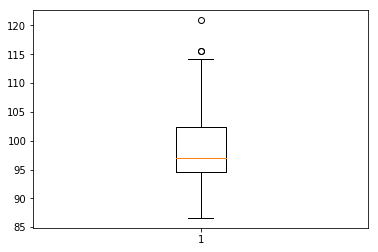


 Current variable: carlength


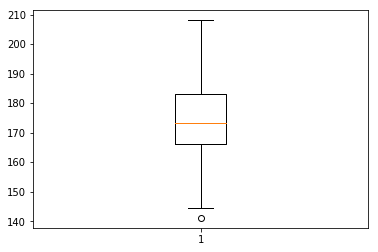


 Current variable: carwidth


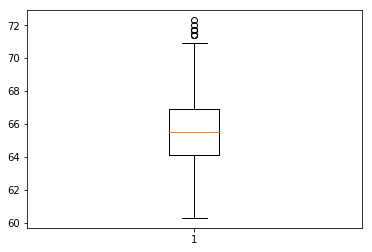


 Current variable: carheight


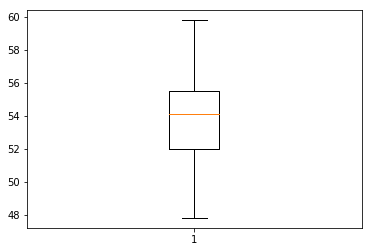


 Current variable: curbweight


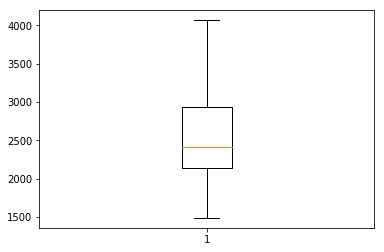


 Current variable: enginesize


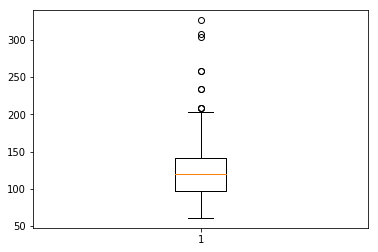


 Current variable: boreratio


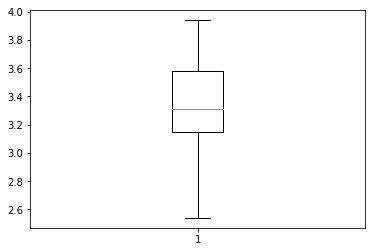


 Current variable: stroke


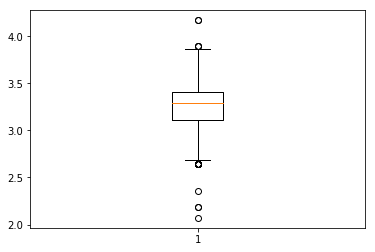


 Current variable: compressionratio


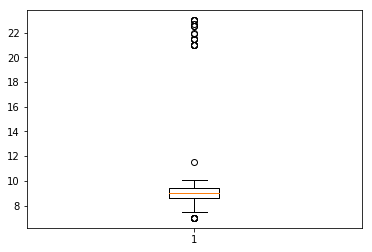


 Current variable: horsepower


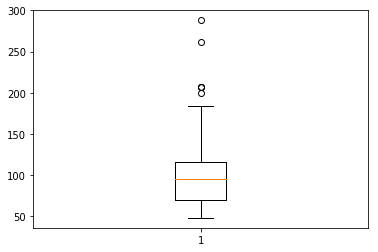


 Current variable: peakrpm


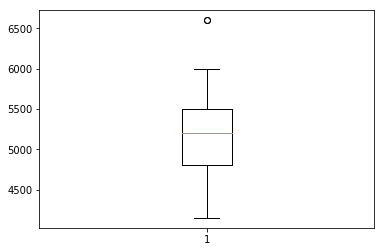


 Current variable: citympg


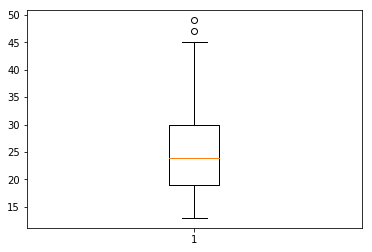


 Current variable: highwaympg


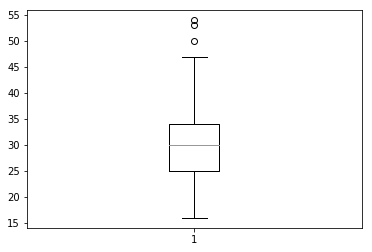


 Current variable: price


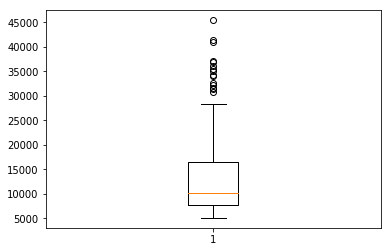

In [7]:
# Visual representation of the numerical variables 
DF1 = pd.DataFrame()
for index in range(len(NumVars)):
    print('\n Current variable:', NumVars[index])
    NumVar = cm.loc[:,NumVars[index]]
    plt.boxplot(NumVar[np.isnan(NumVar)==False])
    plt.show()
    plt.close()

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axe

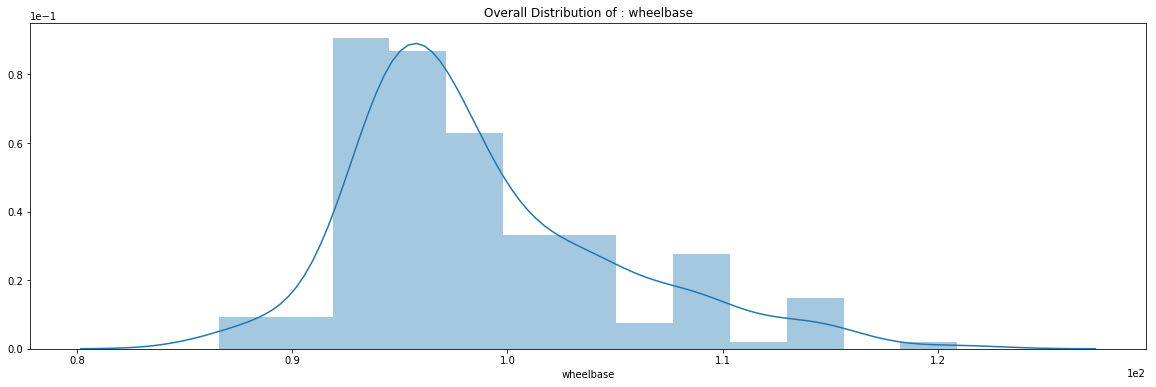

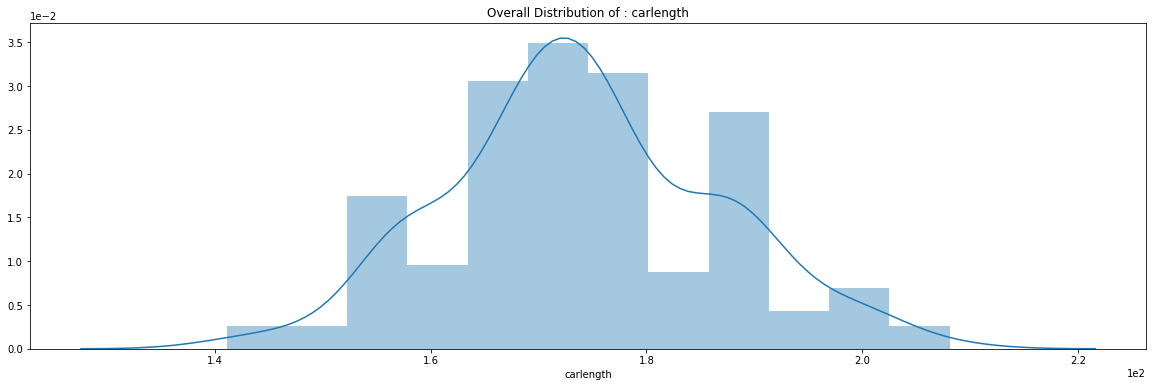

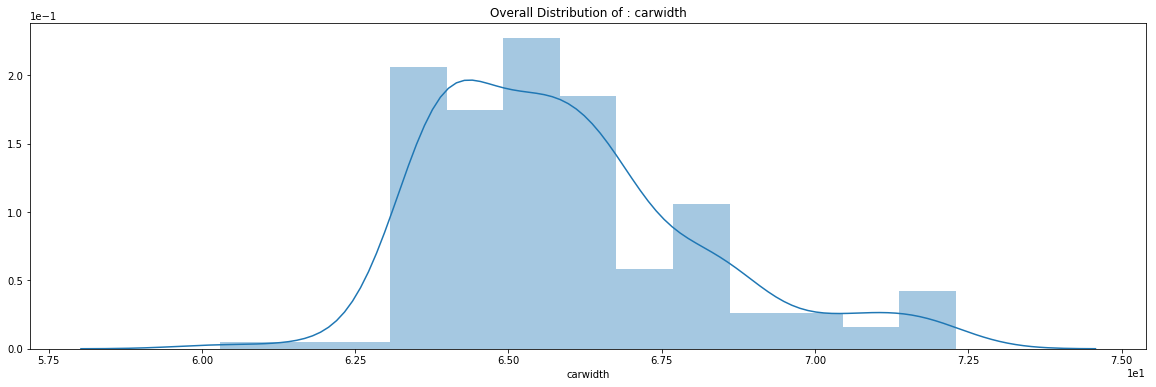

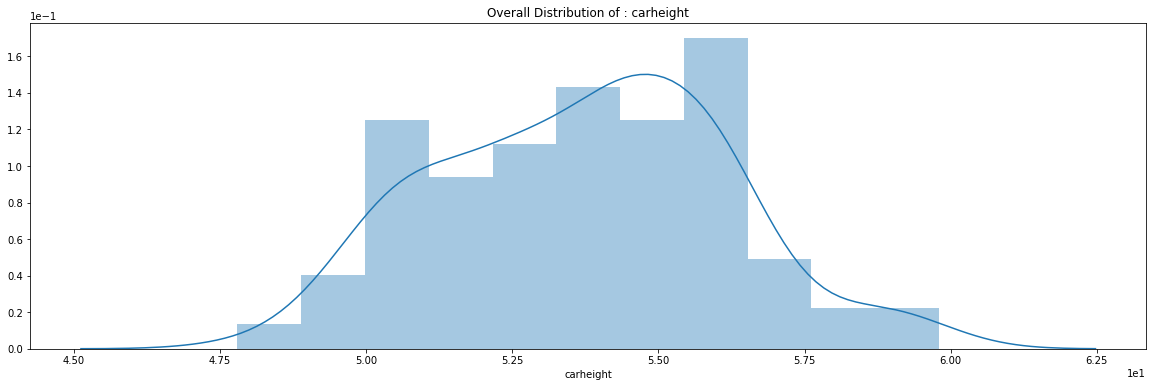

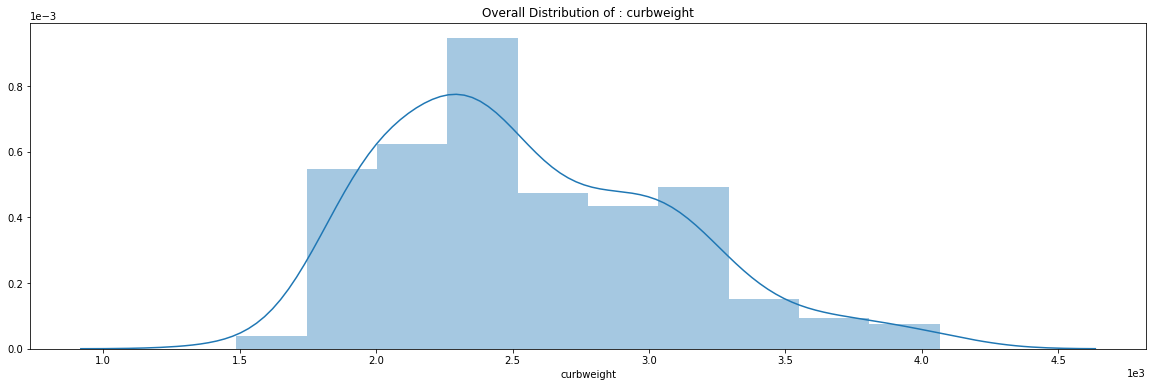

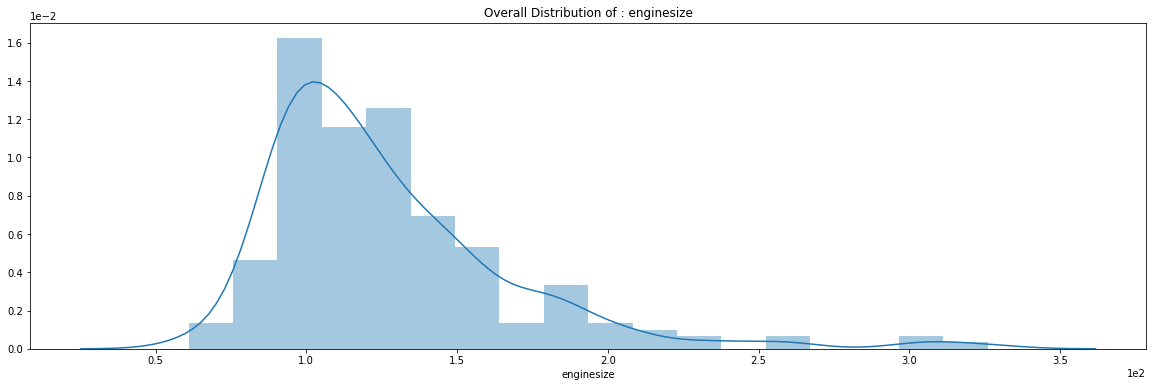

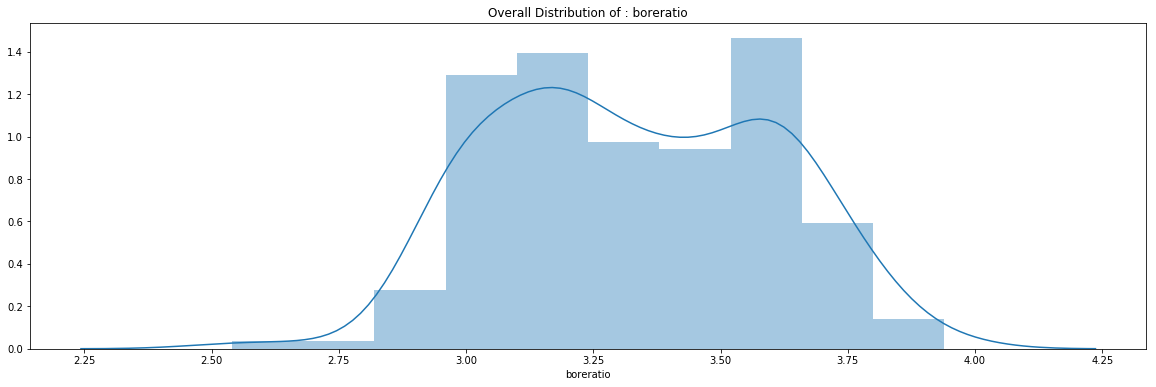

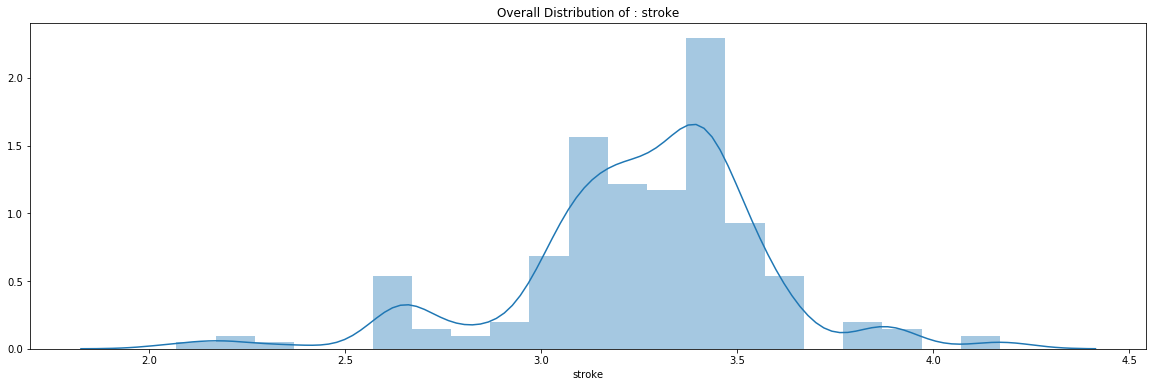

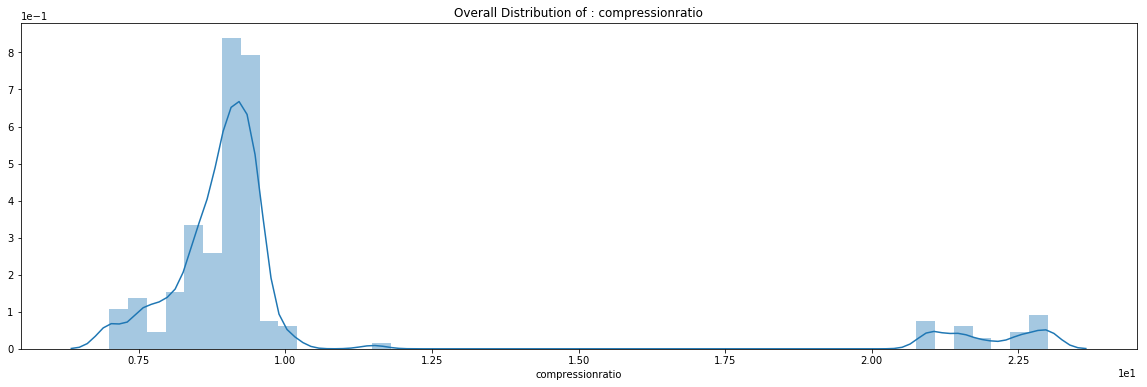

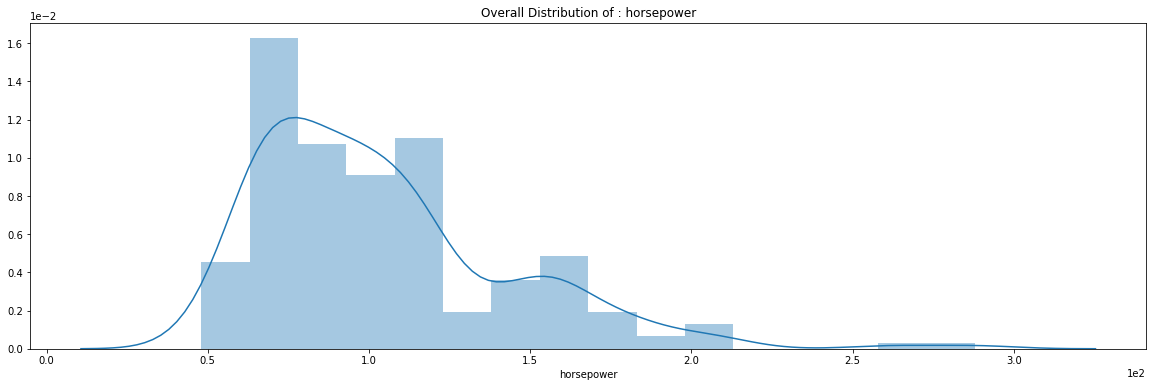

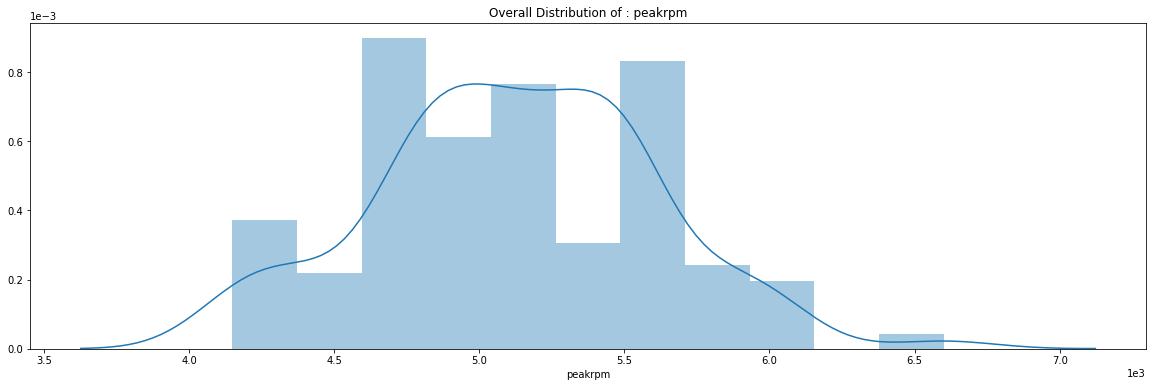

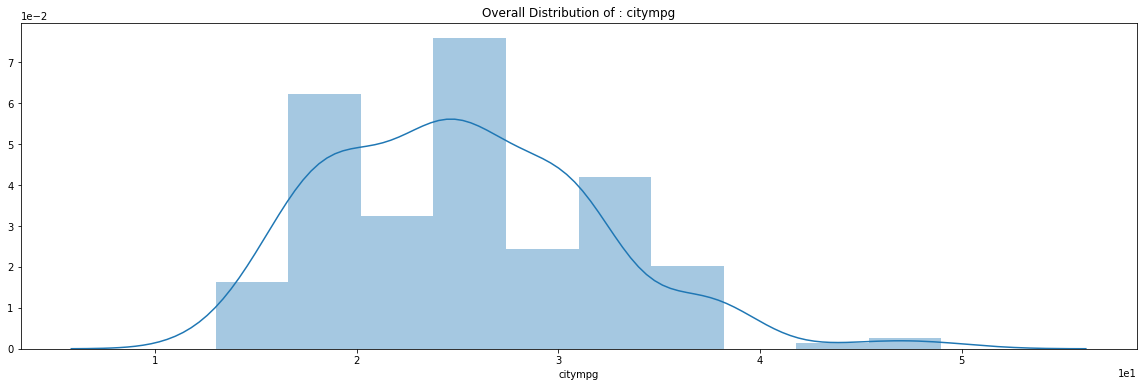

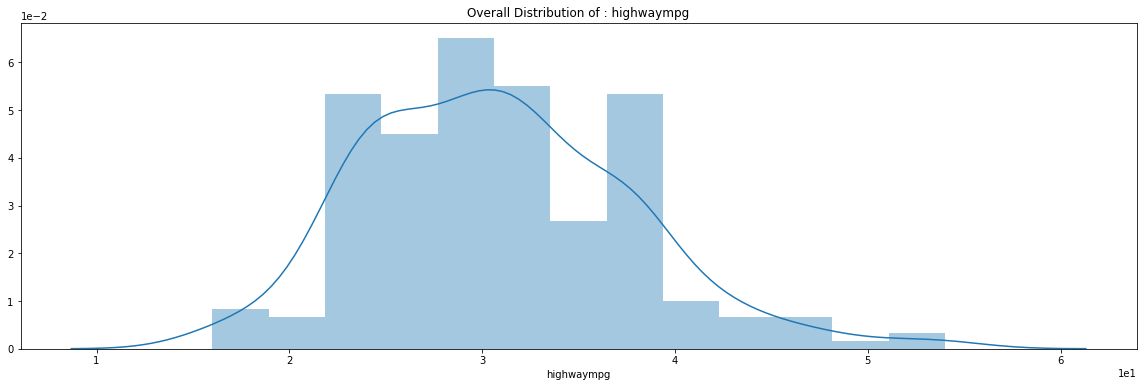

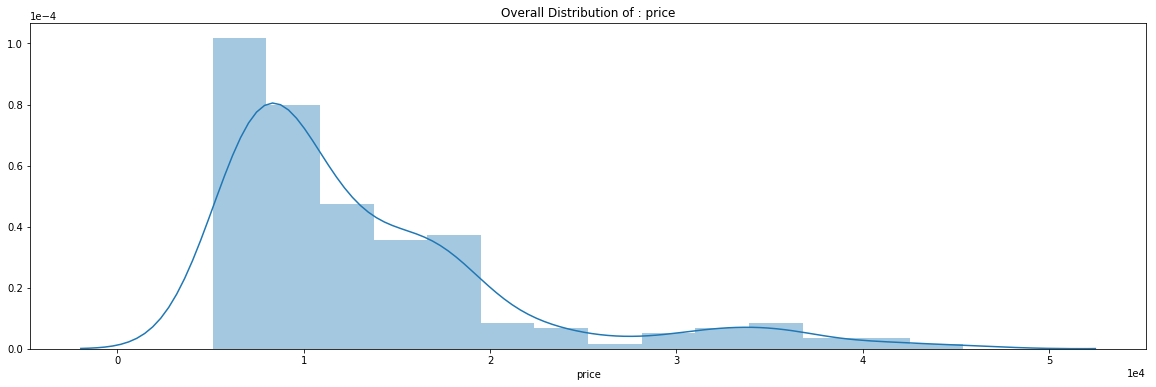

In [8]:
#Histogram has been plotted to show the frequencies of each of the numeric variables
for index in range(len(NumVars)):
    plt.figure(figsize=(20, 6))
    plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    pd.options.display.float_format = '{:.4f}'.format
    
    #plt.subplot(1, 3, 1)
    Plotting_Var = cm.loc[:,NumVars[index]]
    sns.distplot(Plotting_Var[np.isnan(Plotting_Var)==False])
    plt.xticks(rotation=0)
    TitleStr ='Overall Distribution of : ' + NumVars[index]
    plt.title(TitleStr)


Even though the univariate graphs show that there are outlier, the stat variable present in cell 175 shows that mean and median are 
almost the same implying that there are no outliers.

# Bivariate Analysis

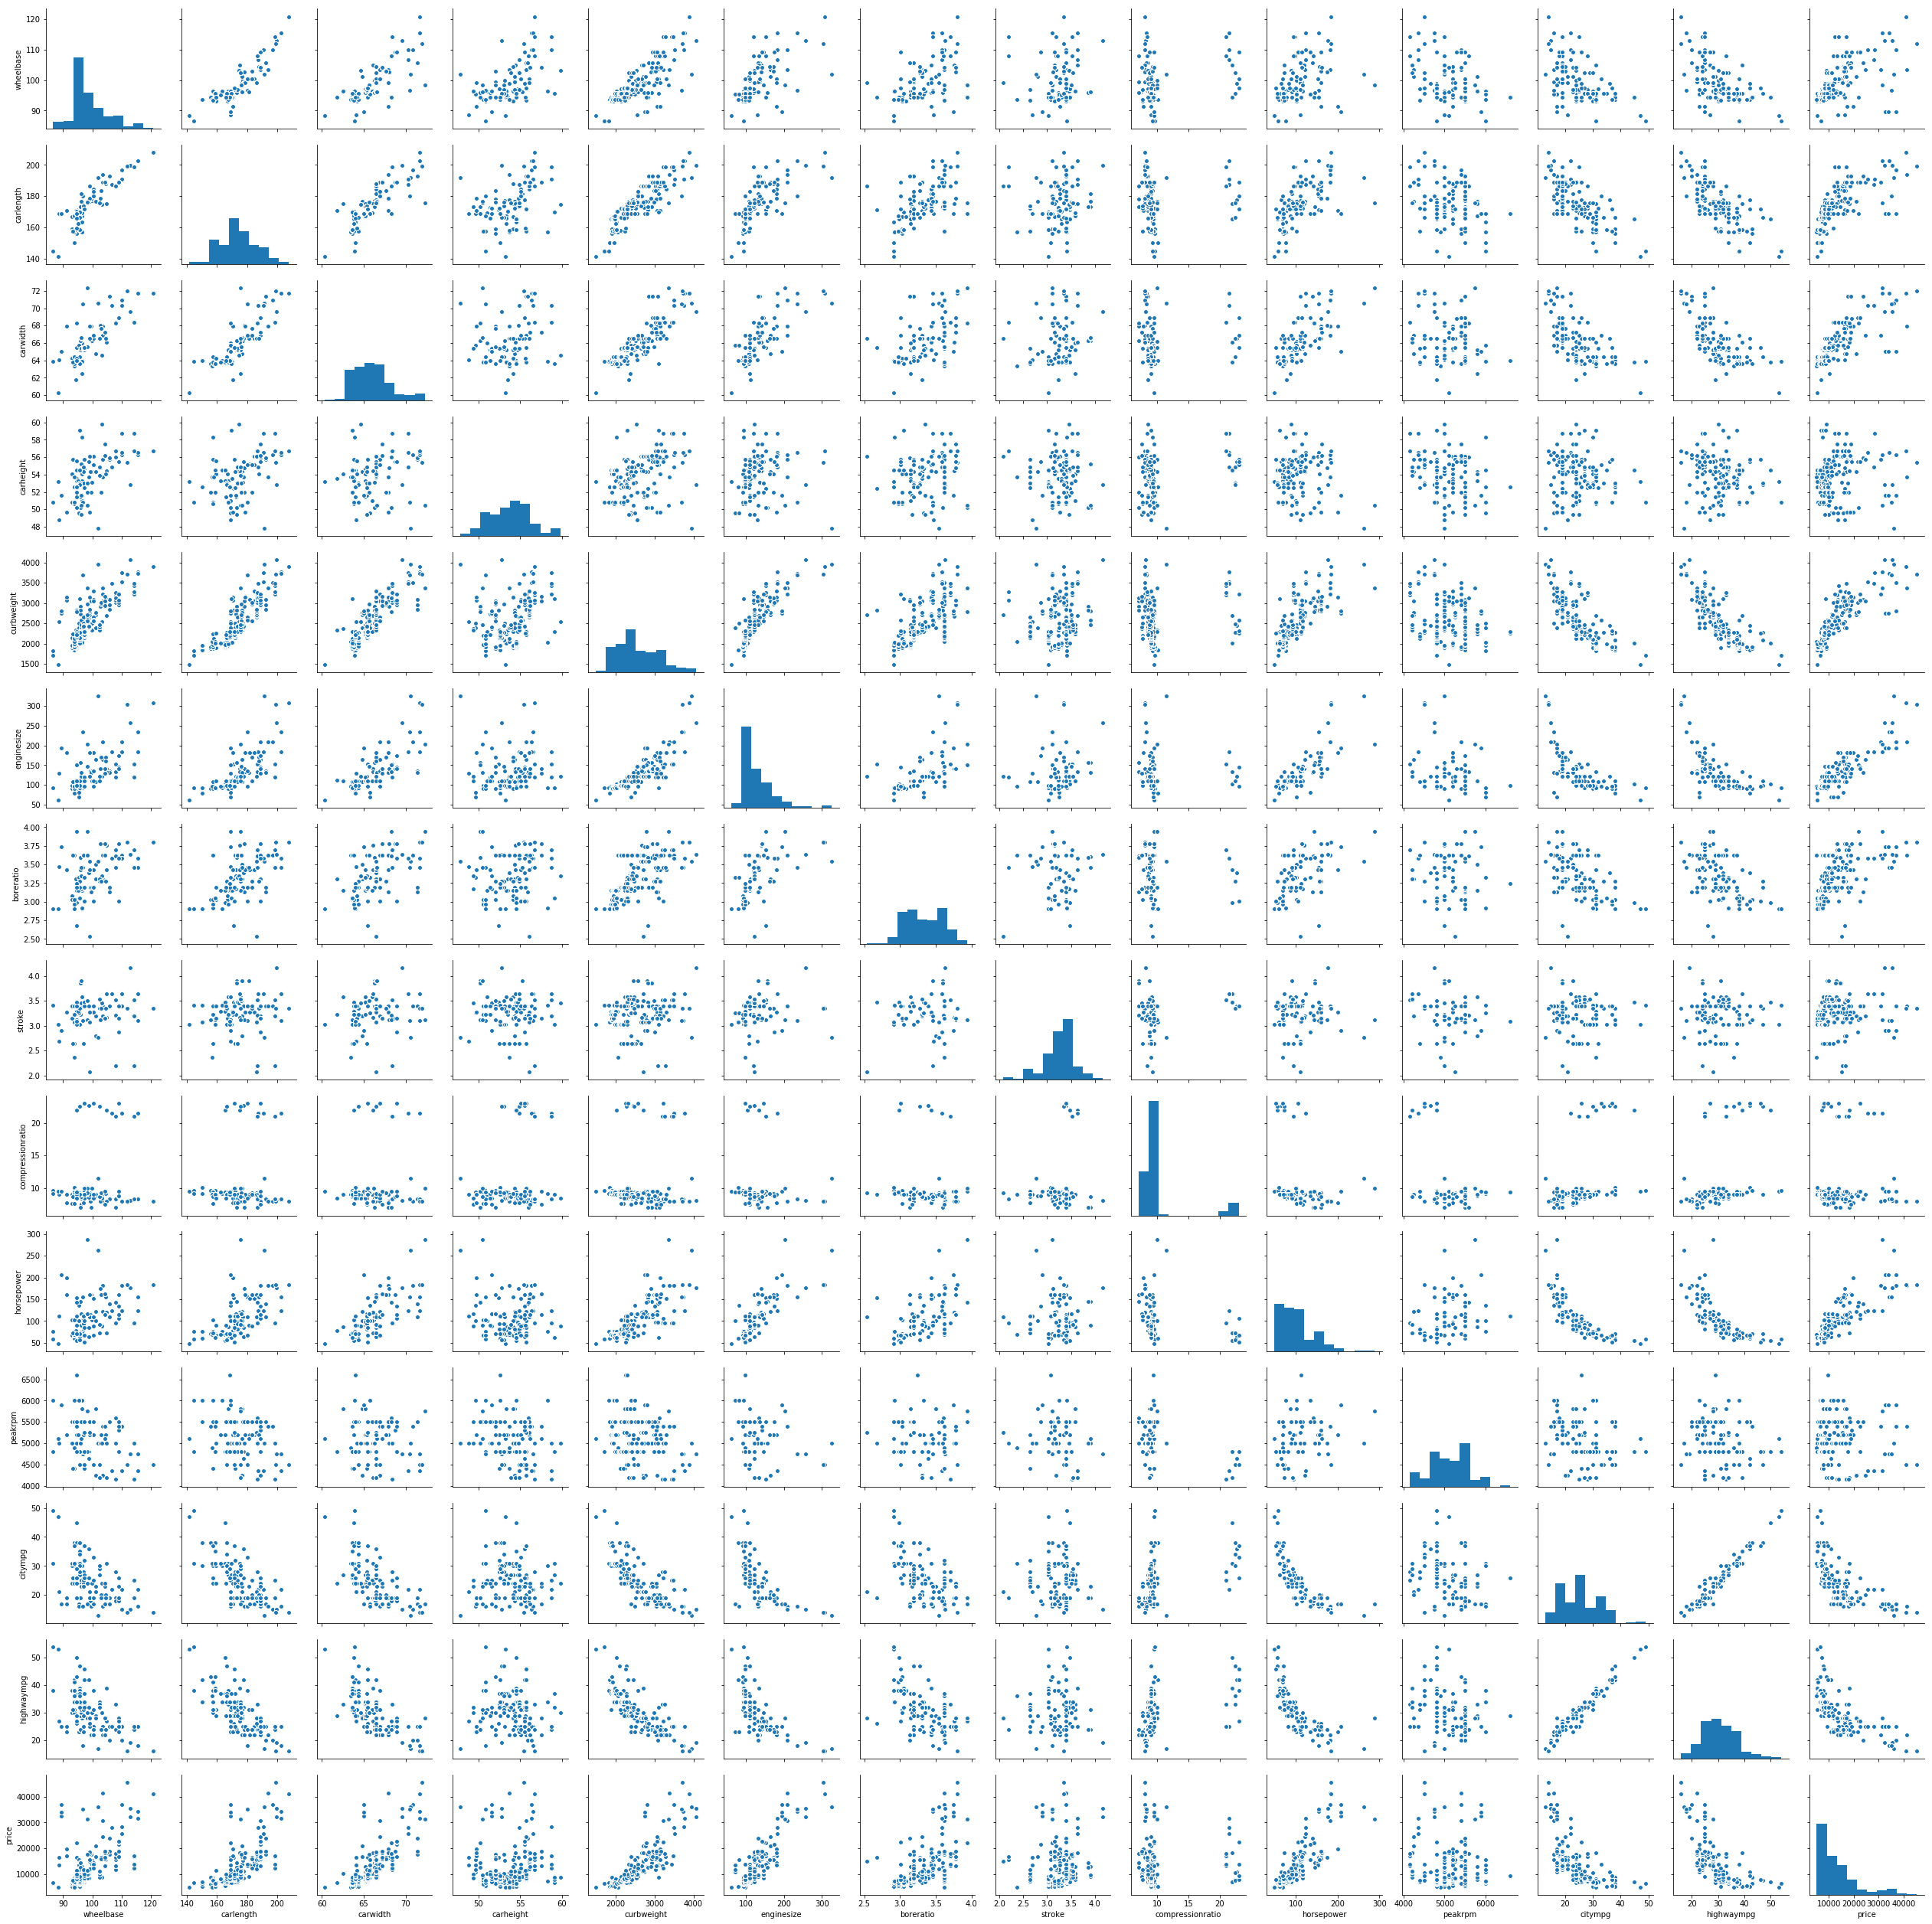

In [9]:
# Visualise the relationship between the features and the response using scatterplots
NumVars_data= cm.loc[:,['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]
sns.pairplot(NumVars_data)

# Observation 
The last column of the pair plot shows the how the data is scattered for each datavariable with respect to the price of the car.
a)Datapoints are spread all over for wheelbase,car height,bore ratio, stroke,compression ratio and peakrpm.
b)There is positive correlation for carlength,car width,engine size,horsepower with the car price. 
c)There is a negative correlation for citympg,highwaympg with the car price

# Data Cleaning 

In [10]:
# Names of the car are retreived from this carname series using split function and the first string gives the car name. Car model has been ignored.
cm['carname']=cm.carname.str.split(' ',1).str[0]
cm['carname']=cm['carname'].str.title()

In [11]:
#The following are name of the models with their true spellings: alfa-romero, audi, bmw, chevrolet, dodge, honda, 
#isuzu, jaguar, mazda, mercedes-benz, mercury, 
#mitsubishi, nissan, peugot, plymouth, porsche, 
#renault, saab, subaru, toyota, volkswagen, volvo.
#Following code is written to correct the spelling mistakes in the car name.
cm['carname']=cm['carname'].str.replace('Toyouta','Toyota')
cm['carname']=cm['carname'].str.replace('Vokswagen','Volkswagen')
cm['carname']=cm['carname'].str.replace('Vw','Volkswagen')
cm['carname']=cm['carname'].str.replace('Maxda','Mazda')
cm['carname']=cm['carname'].str.replace('Porcshce','Porsche')
cm['carname']=cm['carname'].str.replace('Peugeot','Peugot')
cm['carname'].value_counts()

Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Subaru         12
Volkswagen     12
Peugot         11
Volvo          11
Dodge           9
Bmw             8
Buick           8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Chevrolet       3
Jaguar          3
Alfa-Romero     3
Renault         2
Mercury         1
Name: carname, dtype: int64

In [12]:
#Symboling is categorical variable and which  indicates that the auto is more risky than its price. +3 means it is highly risky and -2 means it is safe.
#At first, it looks like ordinal variable but on plotting the graphs for symboling vs price it shows that price is independent of symboling. Risky car as well as safe cars are priced highly.
cm['symboling']=cm['symboling'].astype('str')
cm['symboling'] =cm['symboling'].map({'3': 'high_risk', '2': 'medium_risk','1':'low_risk','0':'low_safe','-1':'medium_safe','-2':'high_safe'})


# Analyzing Categorical Variables


In [13]:
CatVars=['symboling','carname','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation', 'enginetype','cylindernumber', 'fuelsystem']
       
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    plt.figure(figsize=(20, 5))
    plt.subplot(121)
    sns.barplot(x=cat_var, y='price', data=cm)
    TitleStr ='Average price of car by ' + cat_var
    plt.title(TitleStr)
    plt.subplot(122)
    sns.countplot(x=cat_var,data=cm,palette='hls')
    TitleStr1 ='Count of : ' + cat_var
    plt.title(TitleStr1)
    plt.show()
    

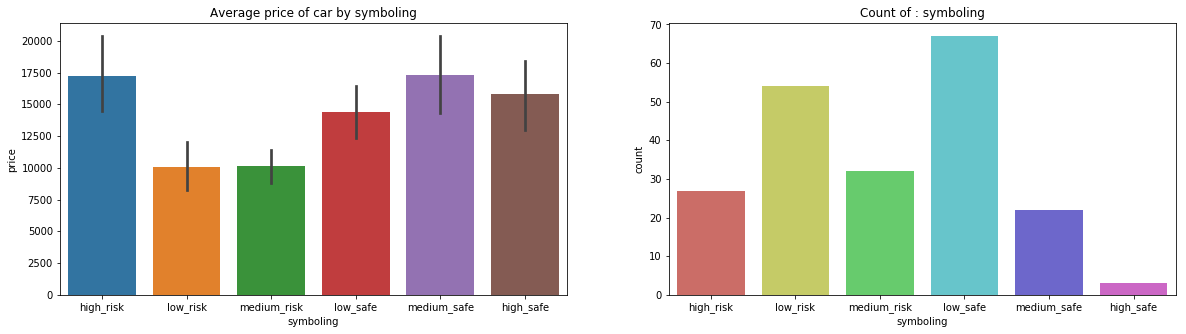

In [14]:
# comparing each categorical variable against price of the car
plot_cat('symboling') 

Symboling is categorical variable and which  indicates that the auto is more risky than its price. +3 means it is highly risky and -2 means it is safe i.e the auto is priced correctly according to its feature and performance. 
At first, it looks like ordinal variable but on plotting the graphs for symboling vs price it shows that price is independent of symboling.

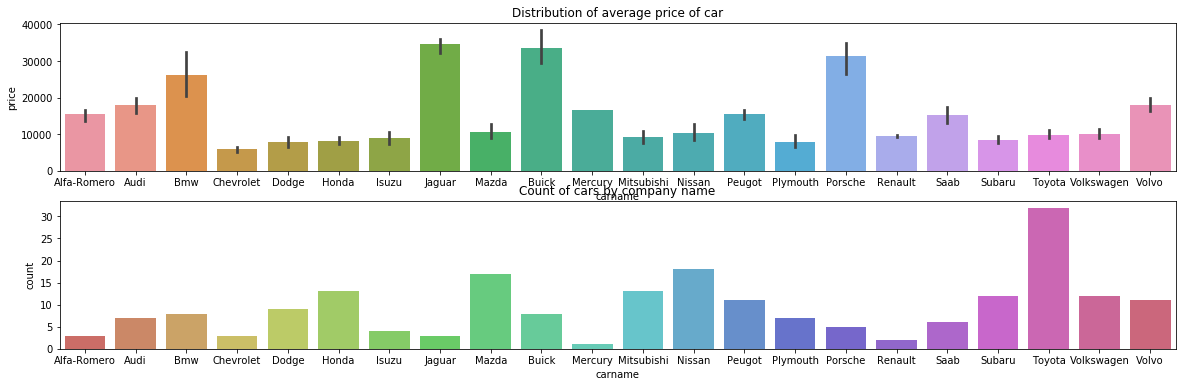

In [15]:
plt.figure(figsize=(20, 6))
plt.subplot(211)
sns.barplot(x='carname', y='price', data=cm)
TitleStr2 ='Distribution of average price of car'
plt.title(TitleStr2)
plt.subplot(212)
sns.countplot(x='carname',data=cm,palette='hls')
TitleStr2 ='Count of cars by company name'
plt.title(TitleStr2)
plt.show()

This shows that Jaguar,Porsche and Buick are luxury cars(highly priced).Alfa-Romero,Audi,BMW,Mazda,Mercury,Peugot,Saab,Volvo,Nissan,Toyota and Volkswagon are semi luxury cars (medium priced) while Chevolet,Dodge, Honda,Isuzu,Mitsubishi,Plymouth,Renault and Subaru are economically priced. So the price is dependent on the make of the car.

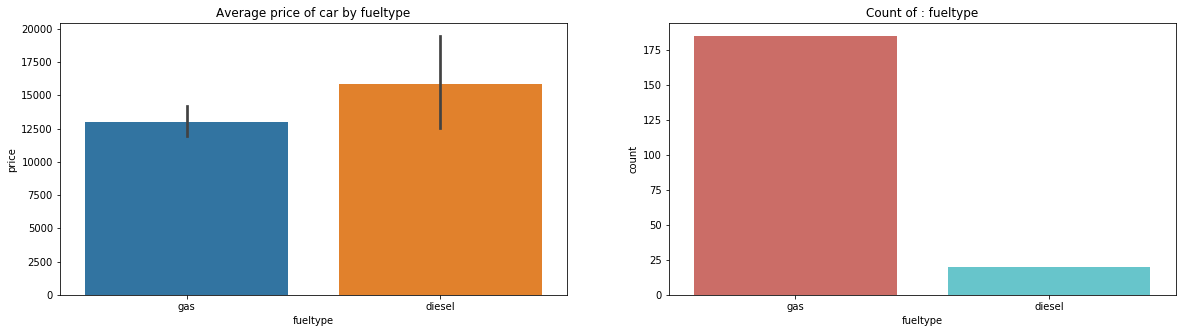

In [16]:
plot_cat('fueltype')

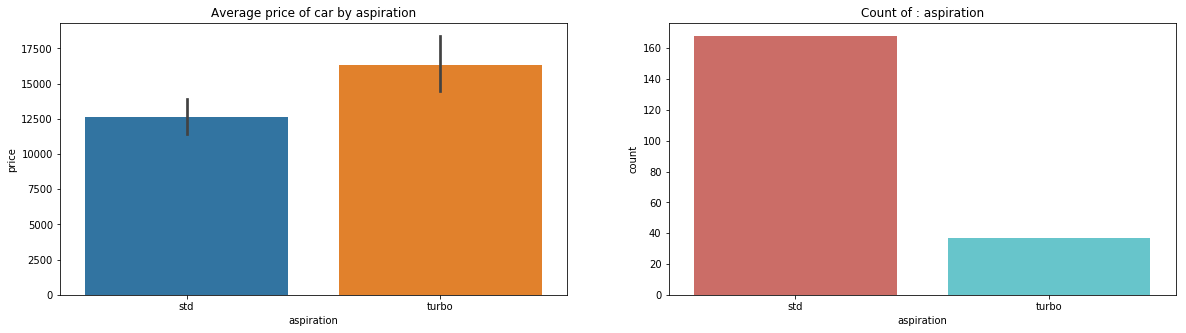

In [17]:
plot_cat('aspiration')

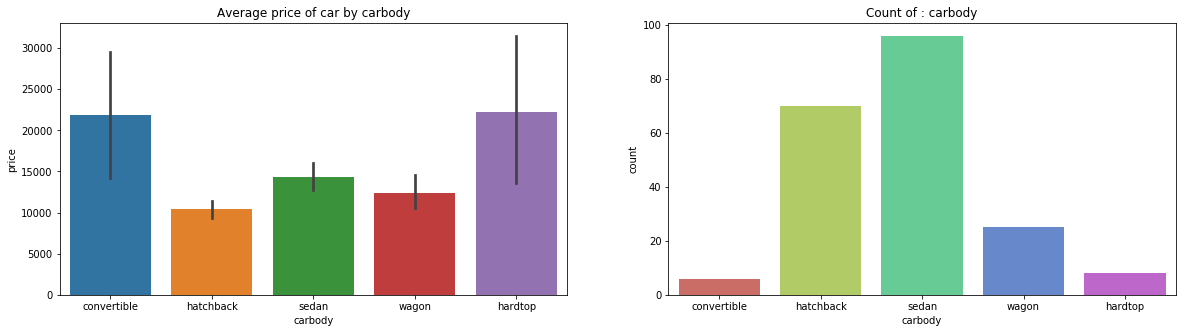

In [18]:
plot_cat('carbody')

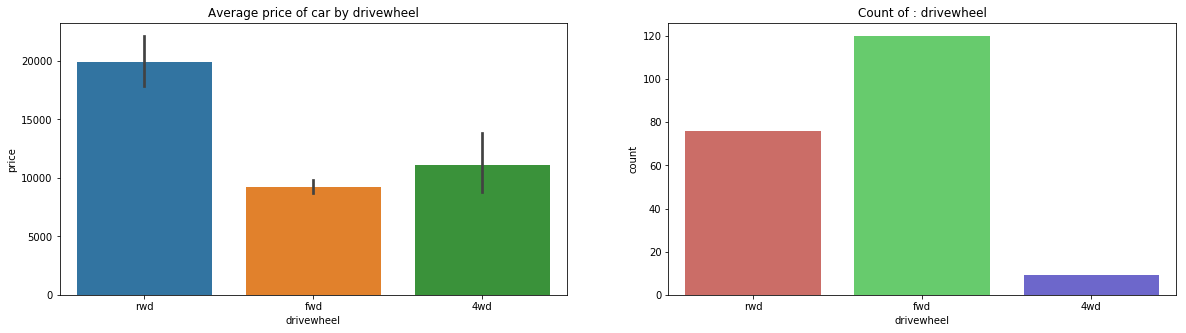

In [19]:
plot_cat('drivewheel')

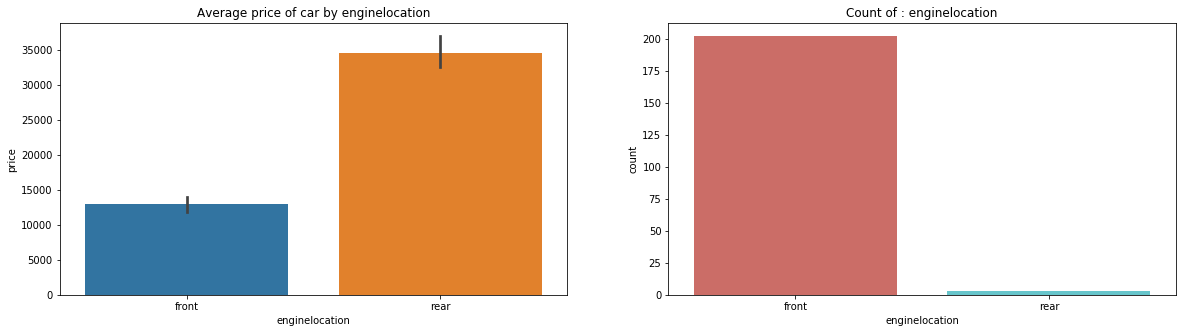

In [20]:
plot_cat('enginelocation')

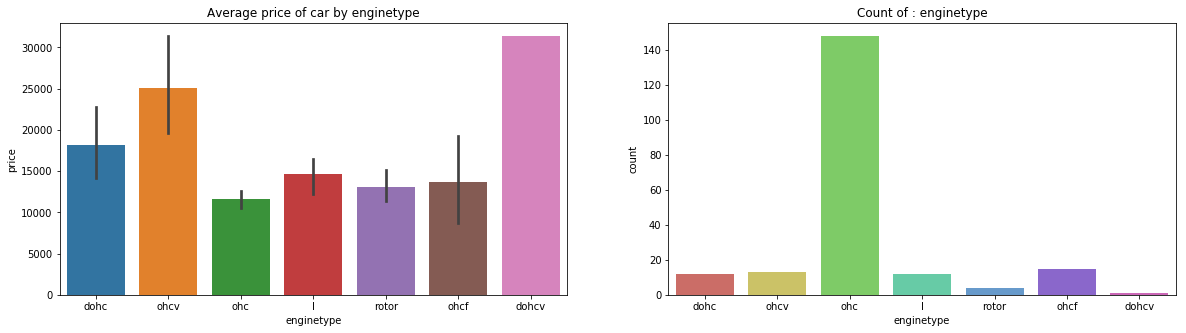

In [21]:
plot_cat('enginetype')

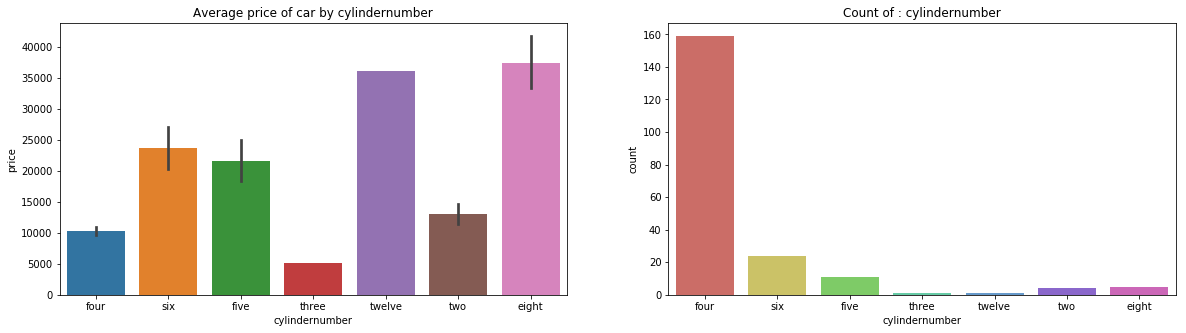

In [22]:
plot_cat('cylindernumber')

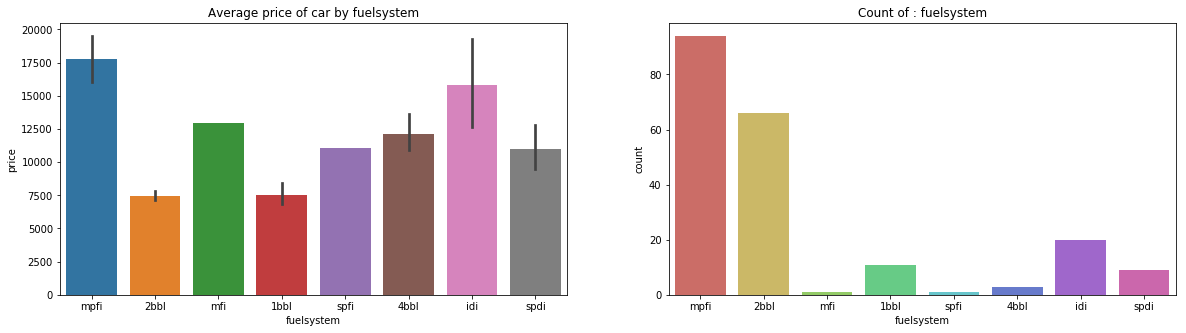

In [23]:
plot_cat('fuelsystem')

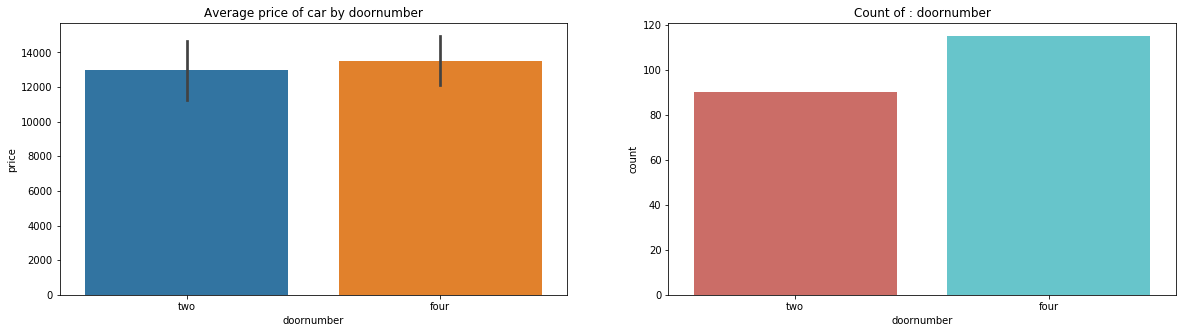

In [24]:
plot_cat('doornumber')

Observation:
a)There are more number of cars with standard aspirated engine.

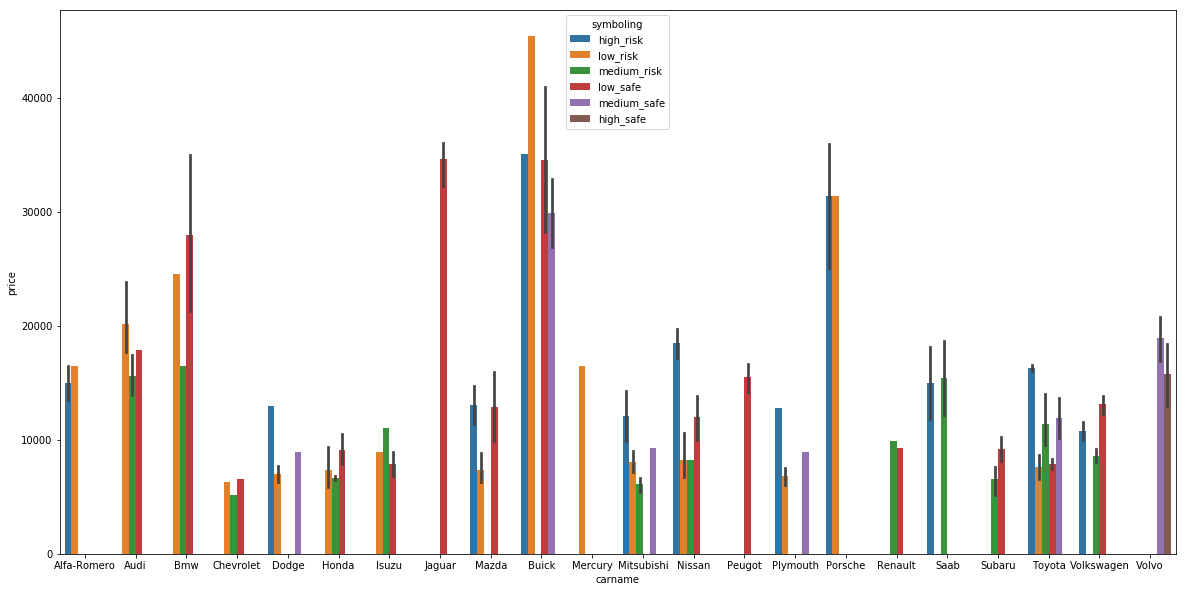

In [25]:
# lets define a function to plot loan_status across categorical variables
def plot_make(cat_var):
    plt.figure(figsize=[20, 10])
    sns.barplot(x='carname', y='price', hue=cat_var, data=cm)
    plt.show()
    
plot_make('symboling')

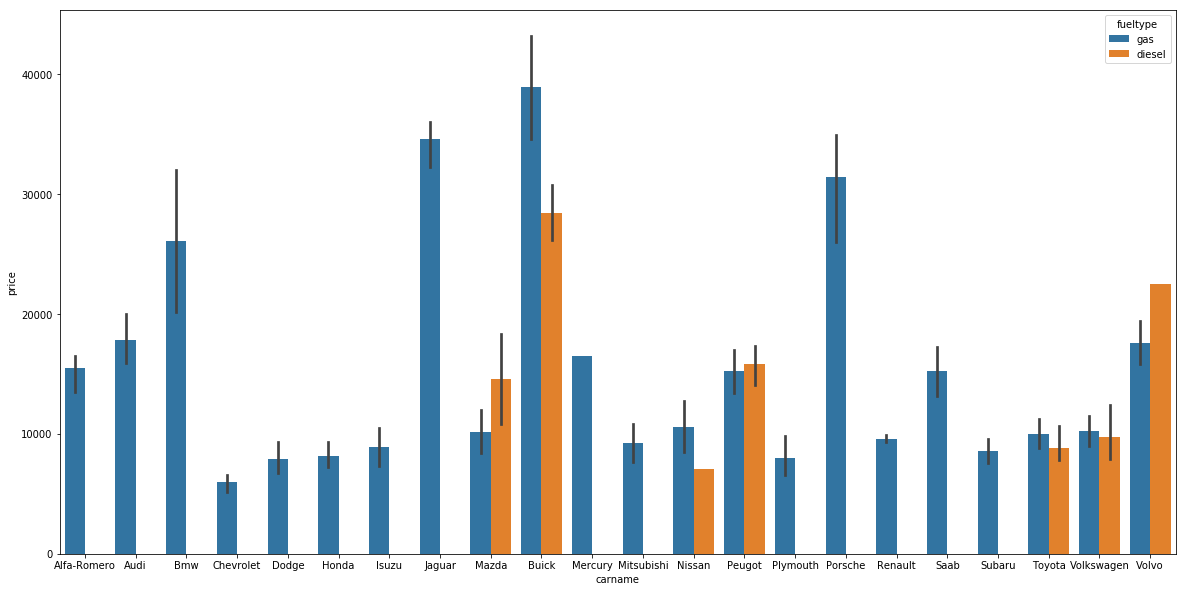

In [26]:
plot_make('fueltype')

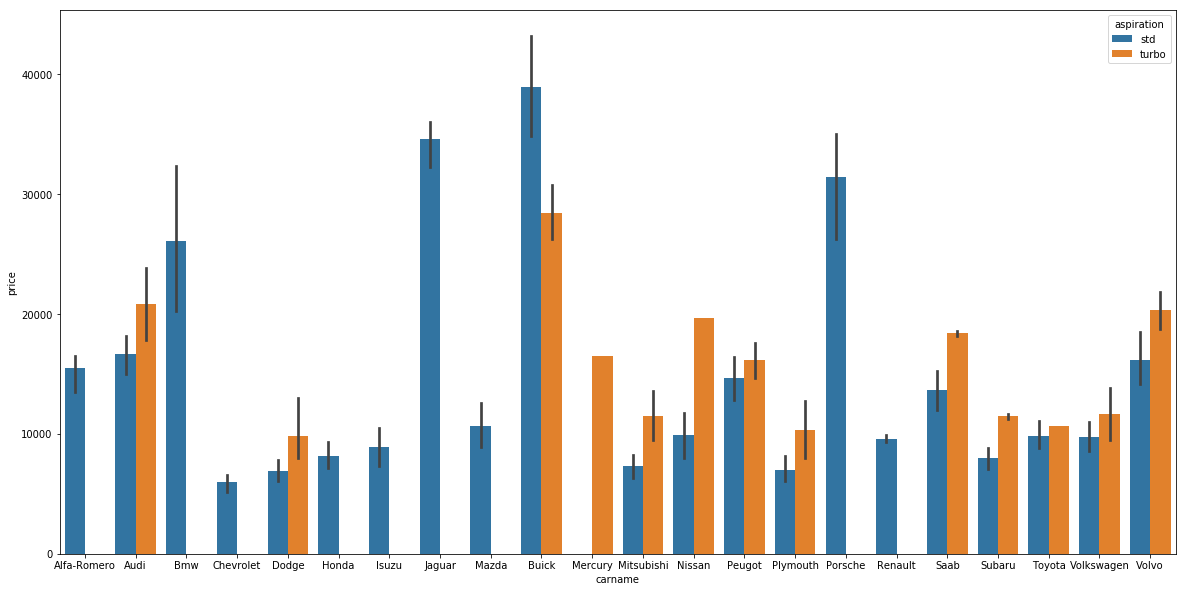

In [27]:
plot_make('aspiration')

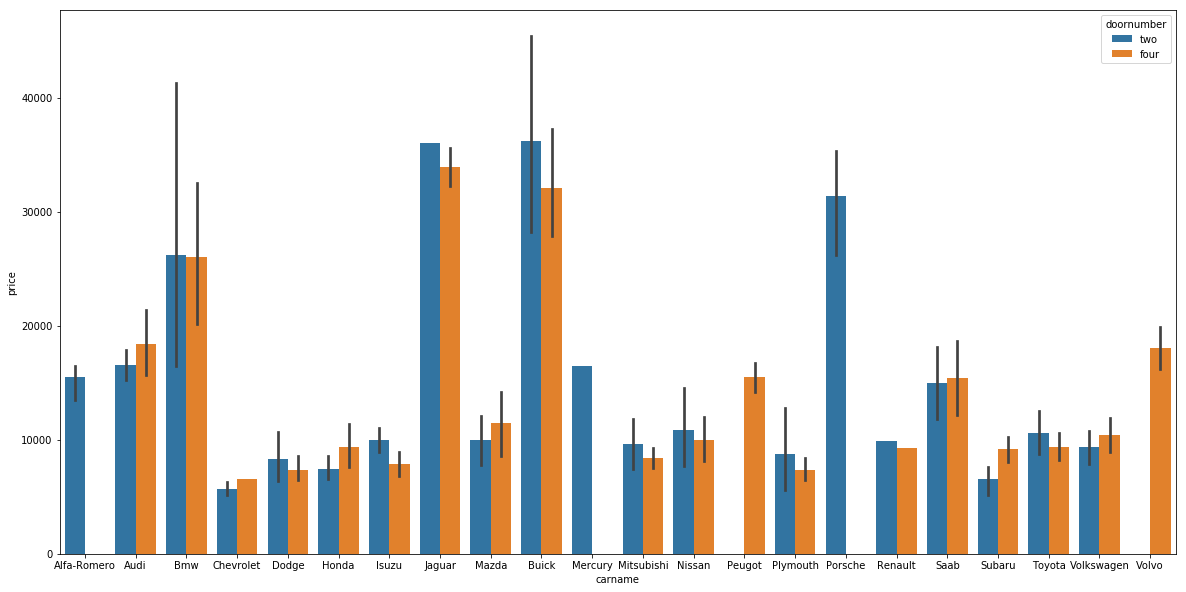

In [28]:
plot_make('doornumber')

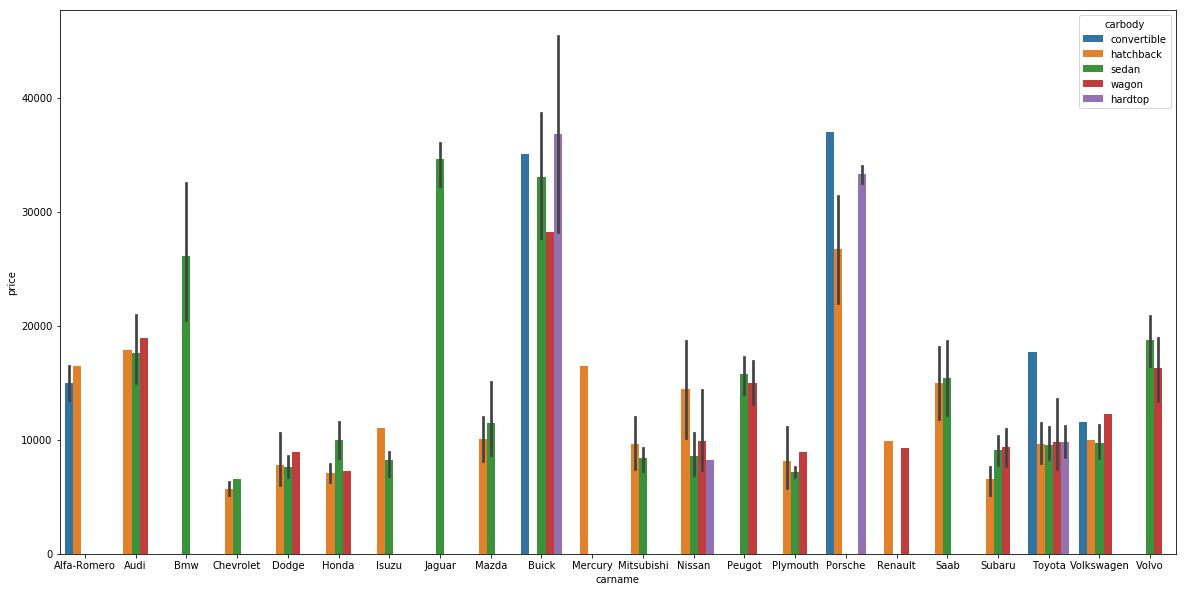

In [29]:
plot_make('carbody')

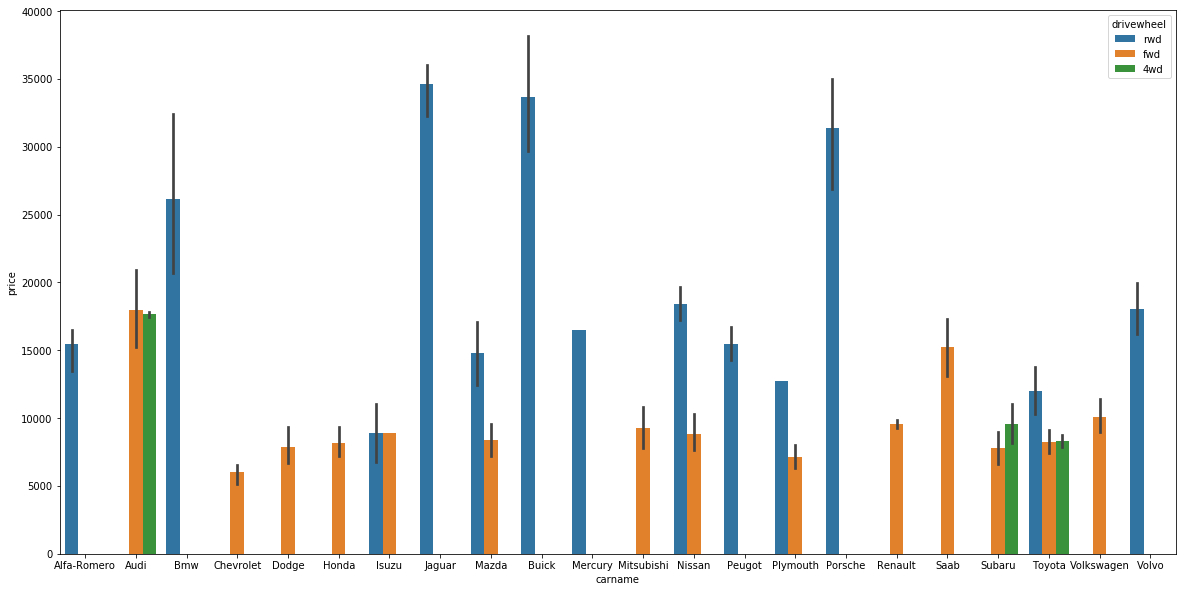

In [30]:
plot_make('drivewheel')

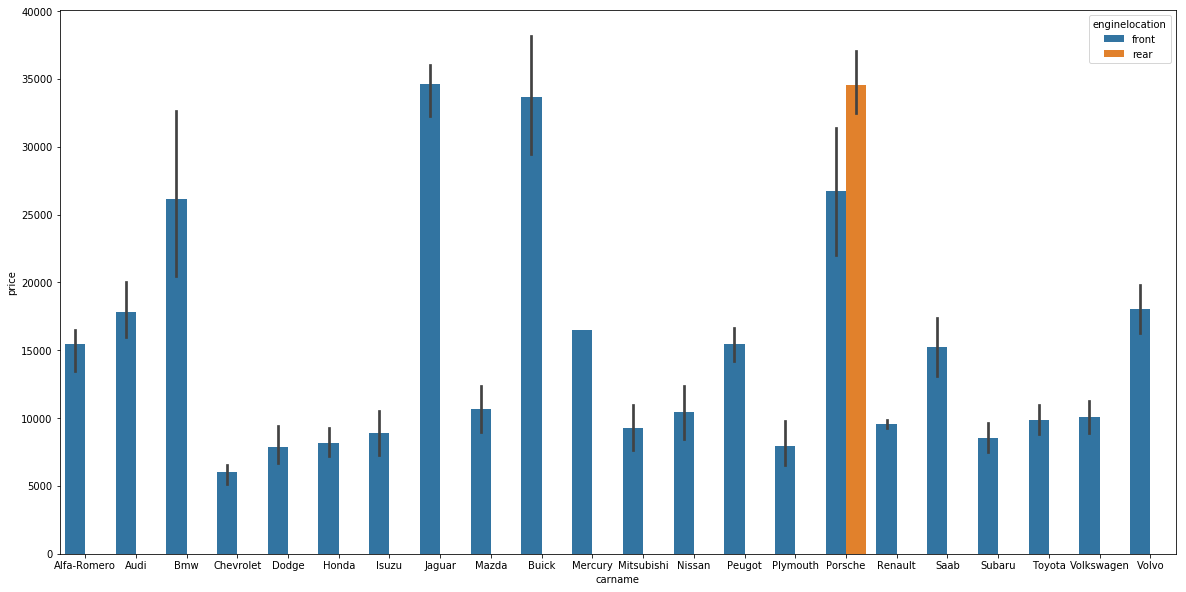

In [31]:
plot_make('enginelocation')

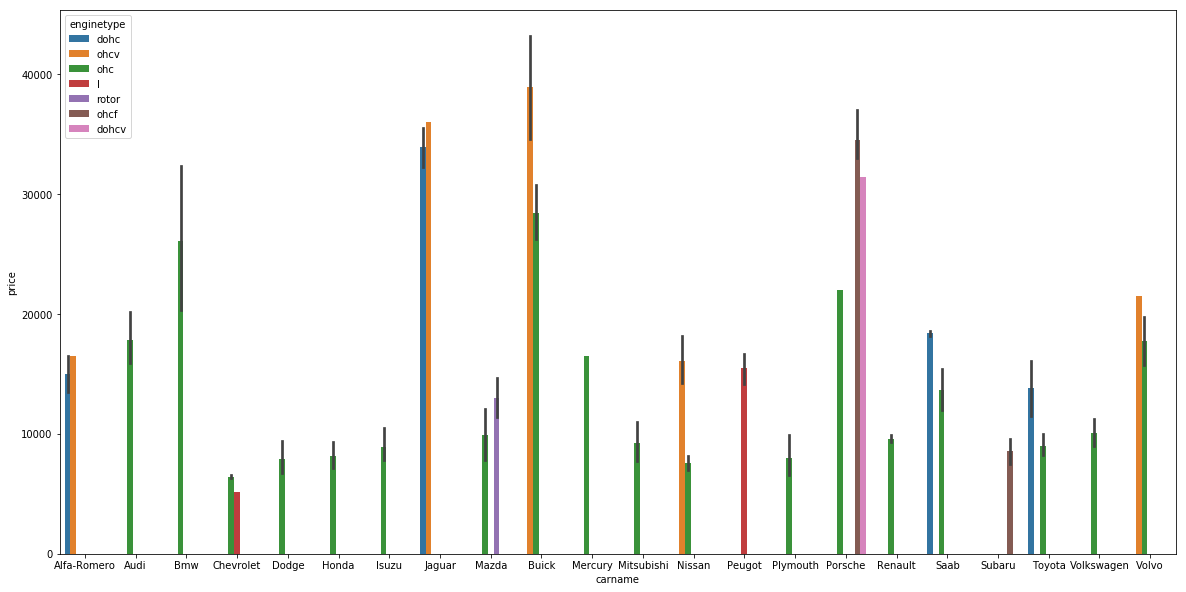

In [32]:
plot_make('enginetype')

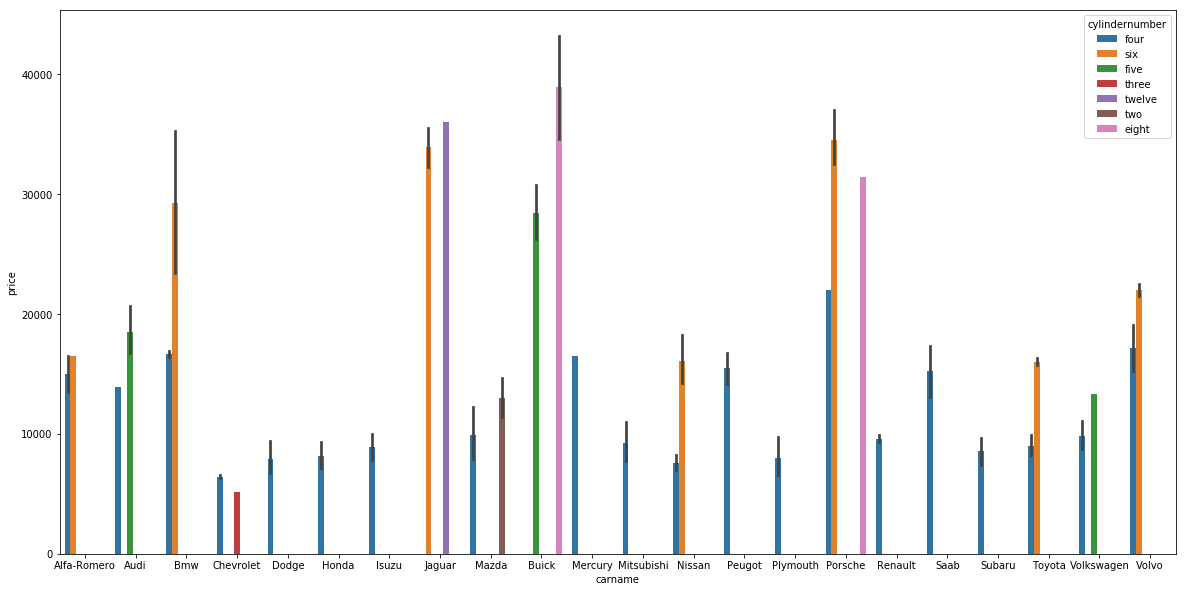

In [33]:
plot_make('cylindernumber')

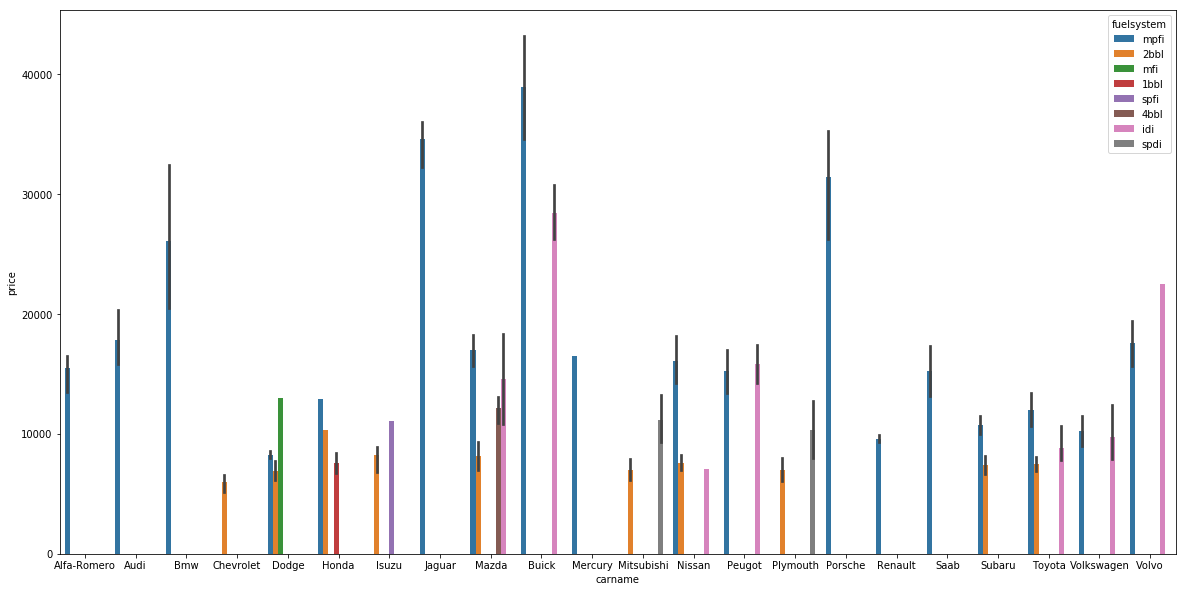

In [34]:
plot_make('fuelsystem')

In [35]:
CatVars=['symboling','carname','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation', 'enginetype','cylindernumber', 'fuelsystem']

In [37]:
# Binning the car price and storing in a separate dataframe

def car_p(s):
    if s.price > 30000 and s.price < 50000 :
        return 'Luxury' 
    elif s.price <=30000 and s.price >10000 : 
         return 'SemiLuxury' 
    elif s.price <=10000:
         return 'Economy'
    else :
         return 'high'
  
cm2=cm.loc[:,['carname','price']]
cm2['carclass']=cm2.apply(car_p,axis=1)
cm2.carclass.value_counts()
cm2.drop(['carname','price'],axis=1,inplace=True)


In [38]:
#Jaguar - Bmw is considered highly priced. Volvo to Mazda is considered as semi luxury. Volkswagen to Chevrolet is considered 
#To understand the car model the binning is done and this variable is dropped before analysis
def car_price(n):
   if n in ['Jaguar','Buick','Porsche','Bmw']:
      return 'Luxury'
   elif n in ['Alfa-Romero','Audi','Bmw','Mazda','Mercury','Peugot','Saab','Volvo','Nissan',]:
      return 'Semi_Luxury'
   elif n in ['Chevrolet','Dodge','Honda','Isuzu','Mitsubishi','Plymouth','Renault','Subaru','Toyota','Volkswagen']:#Toyota
      return 'Economy'
   else:
      return 'high' #This is dummy variable to ensure that none of the company names are left out or not addressed.
        
cm['car_cat'] = cm['carname'].apply(lambda x: car_price(x))
cm['car_cat'].value_counts()

Economy        107
Semi_Luxury     74
Luxury          24
Name: car_cat, dtype: int64

In [39]:
cm=pd.concat([cm,cm2],axis=1)
display(cm.head())

car_id    symboling      carname fueltype aspiration doornumber  \
0       1    high_risk  Alfa-Romero      gas        std        two   
1       2    high_risk  Alfa-Romero      gas        std        two   
2       3     low_risk  Alfa-Romero      gas        std        two   
3       4  medium_risk         Audi      gas        std       four   
4       5  medium_risk         Audi      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front    88.6000   168.8000   64.1000   
1  convertible        rwd          front    88.6000   168.8000   64.1000   
2    hatchback        rwd          front    94.5000   171.2000   65.5000   
3        sedan        fwd          front    99.8000   176.6000   66.2000   
4        sedan        4wd          front    99.4000   176.6000   66.4000   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0    48.8000        2548       dohc           four         130       mpfi   
1    48.8000        2548       dohc           four         130       mpfi   
2    52.4000        2823       ohcv            six         152       mpfi   
3    54.3000        2337        ohc           four         109       mpfi   
4    54.3000        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0     3.4700  2.6800            9.0000         111     5000       21   
1     3.4700  2.6800            9.0000         111     5000       21   
2     2.6800  3.4700            9.0000         154     5000       19   
3     3.1900  3.4000           10.0000         102     5500       24   
4     3.1900  3.4000            8.0000         115     5500       18   

   highwaympg      price      car_cat    carclass  
0          27 13495.0000  Semi_Luxury  SemiLuxury  
1          27 16500.0000  Semi_Luxury  SemiLuxury  
2          26 16500.0000  Semi_Luxury  SemiLuxury  
3          30 13950.0000  Semi_Luxury  SemiLuxury  
4          22 17450.0000  Semi_Luxury  SemiLuxury

In [ ]:
# lets define a function to plot loan_status across categorical variables
def plot_pricetype(cat_var):
    plt.figure(figsize=[20, 10])
    sns.barplot(x='car_cat', y='price', hue=cat_var, data=cm)
    plt.show()
    
plot_pricetype('symboling')

In [ ]:
plot_pricetype('fueltype')

In [ ]:
plot_pricetype('aspiration')

In [ ]:
plot_pricetype('doornumber')

In [ ]:
plot_pricetype('carbody')

In [ ]:
plot_pricetype('cylindernumber')

In [ ]:
plot_pricetype('drivewheel')

In [ ]:
plot_pricetype('enginelocation')

In [ ]:
plot_pricetype('enginetype')

In [ ]:
plot_pricetype('fuelsystem')

# Observation
a) Features of luxury cars:    i)do not have high safe(symboling='-2').All other types are present.
                               ii)Gas and diesel are present.
                               iii)Turbo and standard aspiration present 
                               iv)4 and 2 door type present.
                               v)All types of carbody is present 
                               vi)4,6,5,12,8 cylindernumbers are present. 12 cylinders makes is unique from other cars. 
                               v)Only rear drivewheel present 
                               vi)It has engine location at the rear and front.
                               vii)It has dohc,ohcv,ohc type of engine. 
                               viii)mpfi,idli type of fuelsystem.

b)Features of Semiluxury cars: i)High safe(symboling='-2'), which gives assurance that the car is highly safe is medium priced is present.                    ii)Gas and diesel are present.
                               iii)Turbo and standard aspiration present
                               iv)4 and 2 door type present.
                               v)All types of carbody is present 
                               vi)4,6,5,2 cylindernumbers are present. 2 cylinders makes is unique from other cars. 
                               v)All types of drivewheel present
                               vi)It has engine location at the front.
                               vii)It has dohc,ohcv,ohc,l,rotor type of engine
                               viii)It has mpfi,idli,2bbl,4bb1 type of fuelsystem.

b)Features of Economy cars:    i)High safe(symboling='-2') are not present.                  
                               ii)Gas and diesel are present.
                               iii)Turbo and standard aspiration present
                               iv)4 and 2 door type present.
                               v)Hardtop and convertible feature not present.
                               vi)3,4 cylindernumbers are present. 
                               v)All types of drivewheel present
                               vi)It has engine location at the front.
                               vii)It has ohc,l,rotor type of engine
                               viii)It has mpfi,2bbl,mfi,lbb1,spfi type of fuelsystem.


# Derived Variables

In [40]:
#Variable known as volume has been created that shows how much of volume will the car have if it had certain height,length and width
cm['volume']=cm['carlength']*cm['carwidth']*cm['carheight']

In [41]:
cm['lengthtowidth']=cm['carlength']/cm['carwidth']

In [42]:
#Variable widthtolength ratio has been created. It has been observed that for every car width there is are different car length.
#This variable is created to understand the impact of carwidth on price of the car.
cm['widthtolength']=cm['carwidth']/cm['carlength']

In [43]:
#Variable wheelbasetowidth is created to measure the wheelbase to trackwidth. Higher the wheelbase means less maneuverability.
cm['wheelbasetowidth']=cm['wheelbase']/cm['carwidth']

In [44]:
#Variable wheelbasetolength is created to measure the wheelbase to length. This is to understand if it affects the price
cm['wheelbasetolength']=cm['wheelbase']/cm['carlength']

In [45]:
#additional ratios are created to understand where it depends on the price.
cm['widthtoheight']=cm['carwidth']/cm['carheight']
cm['heighttolength']=cm['carheight']/cm['carlength']

In [46]:
#Categorical variables with two values have been mapped to 1 or 0.
cm['fueltype'] = cm['fueltype'].map({'gas': 1, 'diesel': 0})
cm['aspiration'] = cm['aspiration'].map({'std': 1, 'turbo': 0})
cm['doornumber'] = cm['doornumber'].map({'four': 1, 'two': 0})
cm['enginelocation'] = cm['enginelocation'].map({'front': 1, 'rear': 0})

In [47]:
#Code for creation of dummy variables for the following categorical variables where the first column has been dropped.,'carname'
DumVars=['symboling','carbody','enginetype','cylindernumber','fuelsystem','drivewheel','carclass','carname']
DF3 = pd.DataFrame()
for index in range(len(DumVars)):
    status = pd.get_dummies(cm[DumVars[index]],drop_first=True)
    cols=status.columns
    status.rename(columns = dict(zip(cols,DumVars[index]+'_'+cols)), inplace=True)
    DF3 = pd.concat([DF3,status],axis=1)
   
display(DF3.shape)

(205, 53)

In [48]:
#After creation of dummy variables, the actual categorical variables or columns are deleted
cm.drop(['car_id','symboling','carbody','enginetype','cylindernumber','fuelsystem','carname','drivewheel','carclass','carname','car_cat'],axis=1,inplace=True)
cm.head()

fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
0         1           1           0               1    88.6000   168.8000   
1         1           1           0               1    88.6000   168.8000   
2         1           1           0               1    94.5000   171.2000   
3         1           1           1               1    99.8000   176.6000   
4         1           1           1               1    99.4000   176.6000   

   carwidth  carheight  curbweight  enginesize  boreratio  stroke  \
0   64.1000    48.8000        2548         130     3.4700  2.6800   
1   64.1000    48.8000        2548         130     3.4700  2.6800   
2   65.5000    52.4000        2823         152     2.6800  3.4700   
3   66.2000    54.3000        2337         109     3.1900  3.4000   
4   66.4000    54.3000        2824         136     3.1900  3.4000   

   compressionratio  horsepower  peakrpm  citympg  highwaympg      price  \
0            9.0000         111     5000       21          27 13495.0000   
1            9.0000         111     5000       21          27 16500.0000   
2            9.0000         154     5000       19          26 16500.0000   
3           10.0000         102     5500       24          30 13950.0000   
4            8.0000         115     5500       18          22 17450.0000   

       volume  lengthtowidth  widthtolength  wheelbasetowidth  \
0 528019.9040         2.6334         0.3797            1.3822   
1 528019.9040         2.6334         0.3797            1.3822   
2 587592.6400         2.6137         0.3826            1.4427   
3 634816.9560         2.6677         0.3749            1.5076   
4 636734.8320         2.6596         0.3760            1.4970   

   wheelbasetolength  widthtoheight  heighttolength  
0             0.5249         1.3135          0.2891  
1             0.5249         1.3135          0.2891  
2             0.5520         1.2500          0.3061  
3             0.5651         1.2192          0.3075  
4             0.5629         1.2228          0.3075

In [49]:
#Dataframe DF3 where the dummy variables have been created and they are appended to the cm dataframe 
cm=pd.concat([cm,DF3],axis=1)
display(cm.head())


fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
0         1           1           0               1    88.6000   168.8000   
1         1           1           0               1    88.6000   168.8000   
2         1           1           0               1    94.5000   171.2000   
3         1           1           1               1    99.8000   176.6000   
4         1           1           1               1    99.4000   176.6000   

   carwidth  carheight  curbweight  enginesize  boreratio  stroke  \
0   64.1000    48.8000        2548         130     3.4700  2.6800   
1   64.1000    48.8000        2548         130     3.4700  2.6800   
2   65.5000    52.4000        2823         152     2.6800  3.4700   
3   66.2000    54.3000        2337         109     3.1900  3.4000   
4   66.4000    54.3000        2824         136     3.1900  3.4000   

   compressionratio  horsepower  peakrpm  citympg  highwaympg      price  \
0            9.0000         111     5000       21          27 13495.0000   
1            9.0000         111     5000       21          27 16500.0000   
2            9.0000         154     5000       19          26 16500.0000   
3           10.0000         102     5500       24          30 13950.0000   
4            8.0000         115     5500       18          22 17450.0000   

       volume  lengthtowidth  widthtolength  wheelbasetowidth  \
0 528019.9040         2.6334         0.3797            1.3822   
1 528019.9040         2.6334         0.3797            1.3822   
2 587592.6400         2.6137         0.3826            1.4427   
3 634816.9560         2.6677         0.3749            1.5076   
4 636734.8320         2.6596         0.3760            1.4970   

   wheelbasetolength  widthtoheight  heighttolength      ...        \
0             0.5249         1.3135          0.2891      ...         
1             0.5249         1.3135          0.2891      ...         
2             0.5520         1.2500          0.3061      ...         
3             0.5651         1.2192          0.3075      ...         
4             0.5629         1.2228          0.3075      ...         

   drivewheel_fwd  drivewheel_rwd  carclass_Luxury  carclass_SemiLuxury  \
0               0               1                0                    1   
1               0               1                0                    1   
2               0               1                0                    1   
3               1               0                0                    1   
4               0               0                0                    1   

   carname_Audi  carname_Bmw  carname_Buick  carname_Chevrolet  carname_Dodge  \
0             0            0              0                  0              0   
1             0            0              0                  0              0   
2             0            0              0                  0              0   
3             1            0              0                  0              0   
4             1            0              0                  0              0   

   carname_Honda  carname_Isuzu  carname_Jaguar  carname_Mazda  \
0              0              0               0              0   
1              0              0               0              0   
2              0              0               0              0   
3              0              0               0              0   
4              0              0               0              0   

   carname_Mercury  carname_Mitsubishi  carname_Nissan  carname_Peugot  \
0                0                   0               0               0   
1                0                   0               0               0   
2                0                   0               0               0   
3                0                   0               0               0   
4                0                   0               0               0   

   carname_Plymouth  carname_Porsche  carname_Renault  carname_Saab  \
0    

# Correlation matrix

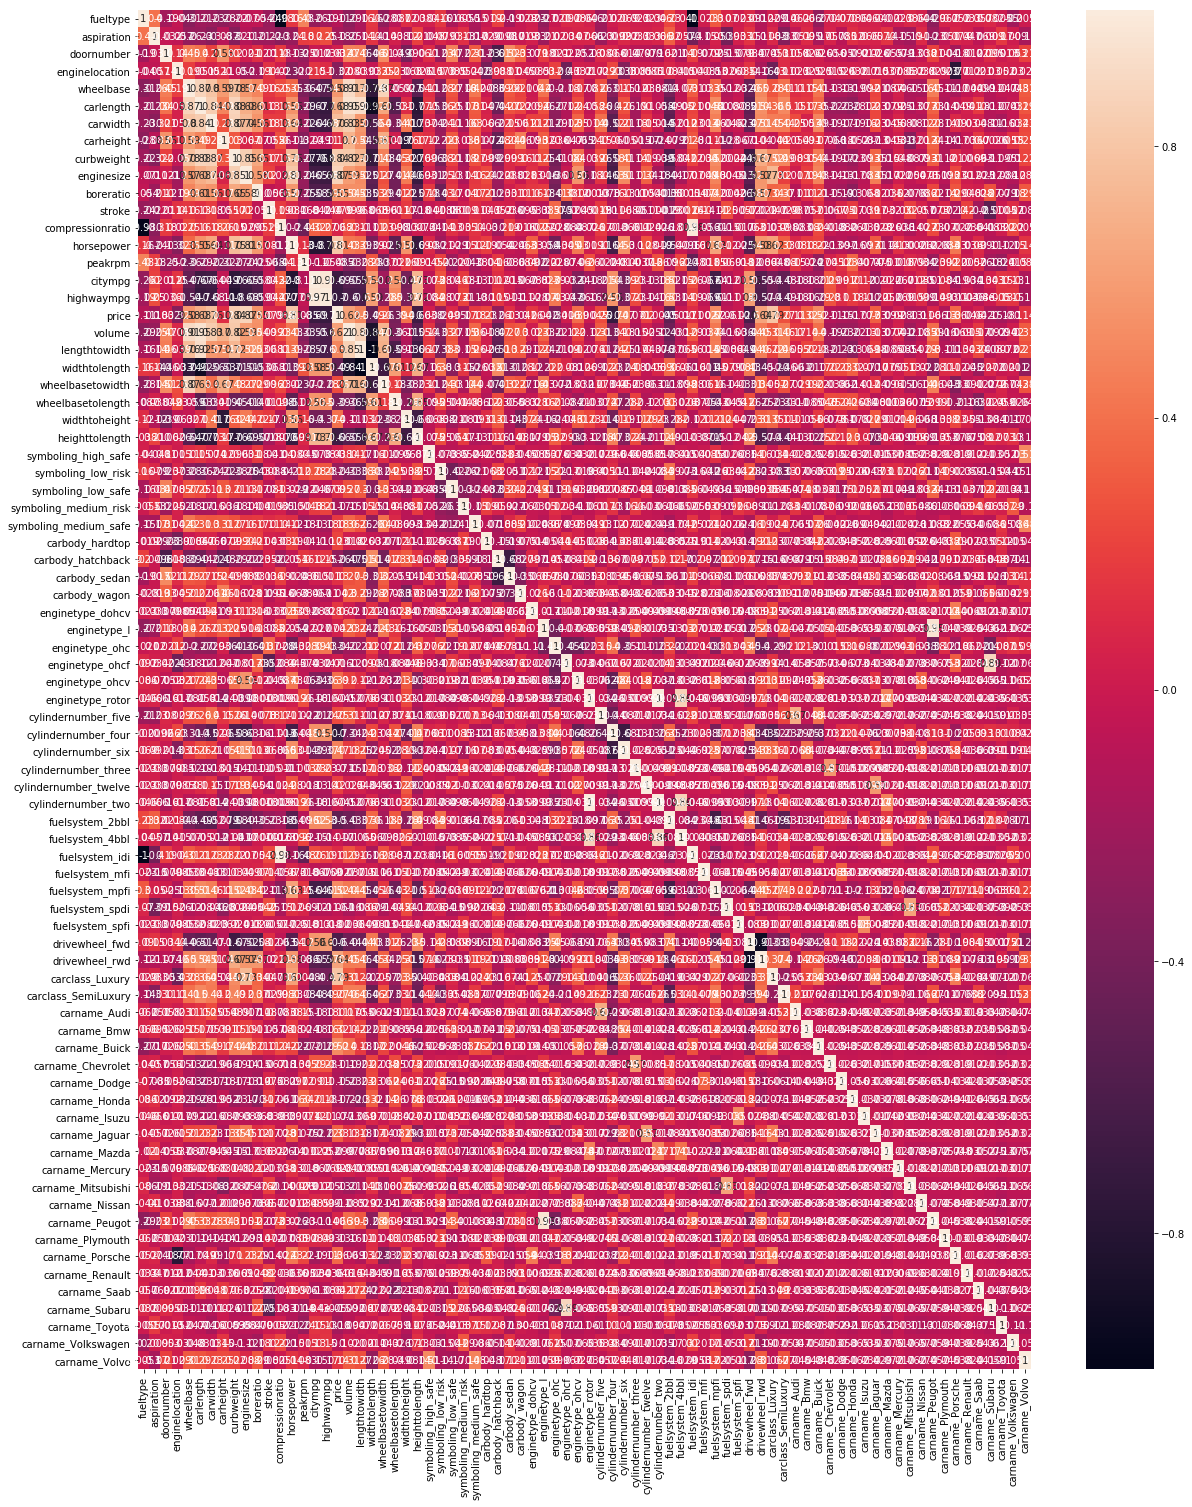

In [50]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (20,25))     # Size of the figure
sns.heatmap(cm.corr(),annot = True)
#cm.corr().to_csv(r"C:\Users\lenovo\Desktop\PreparatoryPython\Machine_Learning\Assignment\correlation.csv")

# Splitting Data into Training and Testing Sets

In [52]:
# Putting feature variable to X
X=cm.loc[:,cm.columns != 'price']
# Putting response variable to y
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns
y=cm['price']

In [53]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Building a linear model

In [54]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm= sm.OLS(y_train,X_train).fit()

In [55]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     54.65
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           2.32e-43
Time:                        06:08:37   Log-Likelihood:                -1198.7
No. Observations:                 143   AIC:                             2539.
Df Residuals:                      72   BIC:                             2750.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
fueltype               -394.88

# Checking VIF

In [56]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [57]:
# Calculating Vif value
vif_cal(input_data=cm,dependent_col='price')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var         Vif
0                fueltype         inf
34           enginetype_l         inf
73         carname_Subaru         inf
68         carname_Peugot         inf
47         fuelsystem_idi         inf
44     cylindernumber_two         inf
42   cylindernumber_three         inf
36        enginetype_ohcf         inf
38       enginetype_rotor         inf
3          enginelocation         inf
5               carlength 100665.0900
18          lengthtowidth  52274.6600
4               wheelbase  30159.8300
20       wheelbasetowidth  19980.4500
6                carwidth  12699.8200
17                 volume   9254.1400
7               carheight   6148.8000
23         heighttolength   4708.8400
19          widthtolength   3273.6900
21      wheelbasetolength   2738.7900
22          widthtoheight   1699.2500
12       compressionratio    298.9600
40    cylindernumber_four    174.1700
9              enginesize     93.5500
13             horsepower     73.9400
8              curbweight     61.8100
41     cylindernumber_six     61.0100
15                citympg     58.6100
49        fuelsystem_mpfi     53.7400
16             highwaympg     46.0700
45        fuelsystem_2bbl     42.0000
39    cylindernumber_five     35.7100
74         carname_Toyota     31.6400
53         drivewheel_rwd     26.1300
31          carbody_sedan     25.6400
35         enginetype_ohc     23.6000
61          carname_Honda     23.5200
76          carname_Volvo     22.6500
64          carname_Mazda     21.5500
67         carname_Nissan     21.2200
58          carname_Buick     19.7100
30      carbody_hatchback     19.6500
66     carname_Mitsubishi     19.1200
70        carname_Porsche     18.7900
10              boreratio     18.3000
57            carname_Bmw     17.5200
75     carname_Volkswagen     17.0200
52         drivewheel_fwd     16.2200
26     symboling_low_safe     15.8300
54        carclass_Luxury     15.3300
56           carname_Audi     15.2700
32          carbody_wagon     13.8400
60          carname_Dodge     13.2800
63         carname_Jaguar     11.9900
43  cylindernumber_twelve     11.6300
50        fuelsystem_spdi     11.6200
25     symboling_low_risk     11.4900
72           carname_Saab     11.4500
28  symboling_medium_safe     11.2000
33       enginetype_dohcv     10.6000
69       carname_Plymouth     10.1700
14                peakrpm      9.4700
1              aspiration      8.2500
62          carname_Isuzu      7.7300
37        enginetype_ohcv      7.6300
11                 stroke      7.2800
27  symboling_medium_risk      7.2600
46        fuelsystem_4bbl      6.9700
59      carname_Chevrolet      6.2900
55    carclass_SemiLuxury      6.2800
71        carname_Renault      4.4200
2              doornumber      4.3100
29        carbody_hardtop      3.9400
65        carname_Mercury      3.6000
24    symboling_high_safe      3.3300
51        fuelsystem_spfi      3.3000
48         fuelsystem_mfi      2.6400

# Perform RFE

In [62]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [63]:
# Running RFE with the output number of the variable equal to 35.
lm = LinearRegression()
rfe = RFE(lm,3)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False False False False False False False  True False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False]
[55 19 49 44 26  3 17 24  1  9 11 15 56 34 35 32 33 50  1  2 27 66 42 21
 61 69 71 65 30 36 22 28 37 48 72 58 38 60 12  8  5 13 14 16 10 41 57 54
 73 68 67 74 64 29  1 53 31  4 51 63 23 62 52 40 39 75 20 46 59 25  6 70
 18 45 47 43  7]


In [64]:
#Store the variables that have been selected by RFE
col = X_train.columns[rfe.support_]
type(col)

pandas.core.indexes.base.Index

In [65]:
#Store the variables that have not been selected by RFE 
col_del=X_train.columns[~rfe.support_]



In [66]:
#Col_del is converted to list and constant is dropped
col_del.tolist()
col_del=[x for x in col_del if x!='const']


# Building model using sklearn


In [67]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     305.0
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           6.24e-61
Time:                        06:10:24   Log-Likelihood:                -1339.2
No. Observations:                 143   AIC:                             2686.
Df Residuals:                     139   BIC:                             2698.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.322e+04    240.047     

In [1854]:
#drop all variables from 'cm' dataframe that are not supported by RFE
cm=cm.drop(col_del,axis=1)
# Calculating Vif value
vif_cal(input_data=cm,dependent_col='price')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var         Vif
22   cylindernumber_three         inf
24     cylindernumber_two         inf
19       enginetype_rotor         inf
18           enginetype_l         inf
30         carname_Peugot         inf
3               carlength 219945.7100
11          lengthtowidth 144154.3600
13       wheelbasetowidth  78032.5600
2               wheelbase  69245.2000
10                 volume  12057.8400
4                carwidth   9622.2100
14      wheelbasetolength   8406.8400
12          widthtolength   5916.1000
15          widthtoheight   4341.9500
16         heighttolength   4283.7200
1          enginelocation    326.1800
5              curbweight     95.9500
6              enginesize     90.3300
21    cylindernumber_four     54.7300
7               boreratio     49.8900
8                  stroke     30.4500
9              horsepower     24.1900
0              aspiration     11.7500
32        carname_Porsche      5.8200
26        carclass_Luxury      4.9500
25        fuelsystem_4bbl      4.0900
20    cylindernumber_five      3.6100
23  cylindernumber_twelve      2.5600
34          carname_Volvo      2.5200
33           carname_Saab      2.2200
28          carname_Dodge      1.8300
29     carname_Mitsubishi      1.7600
27            carname_Bmw      1.7400
17    symboling_high_safe      1.5400
31       carname_Plymouth      1.5000

In [1855]:
# Function summary has been created for dropping variables from X_train_rfe where p>0.05 and VIF is very high or variables are drops the R-squared value.
# Also for displaying the summary of the linear model once the variable is delted along with its VIF values
del_list = [] # Outside this function a variable called del_list that will store all variables that have to be deleted from 'cm' dataframe
def summary(n):
    X_train_rfe.drop([n],axis=1,inplace=True)   
    del_list.append(n)
    #Let's see the summary of our second linear model
    lm_3 = sm.OLS(y_train,X_train_rfe).fit()
    print(del_list)
    print(lm_3.summary())
    cm.drop([n],axis=1,inplace=True)
    display(vif_cal(input_data=cm, dependent_col="price"))
    return del_list,lm_3 


In [1856]:
#Dropping variable is sent to the function and after dropping the summary is displayed 
c1,lm1=summary('horsepower') #R - squared remains the same


['horsepower']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     119.3
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           1.91e-71
Time:                        22:02:53   Log-Likelihood:                 287.86
No. Observations:                 143   AIC:                            -509.7
Df Residuals:                     110   BIC:                            -411.9
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const          

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var         Vif
17           enginetype_l         inf
21   cylindernumber_three         inf
23     cylindernumber_two         inf
18       enginetype_rotor         inf
29         carname_Peugot         inf
3               carlength 219945.7100
10          lengthtowidth 144041.4000
12       wheelbasetowidth  78030.3900
2               wheelbase  69159.3200
9                  volume  11982.6300
4                carwidth   9430.9400
13      wheelbasetolength   8390.3300
11          widthtolength   5913.4400
14          widthtoheight   4303.9000
15         heighttolength   4258.3900
1          enginelocation    325.7300
5              curbweight     92.7400
6              enginesize     89.4200
20    cylindernumber_four     50.0500
7               boreratio     48.7400
8                  stroke     30.4300
0              aspiration     10.4500
31        carname_Porsche      5.5000
25        carclass_Luxury      4.9300
24        fuelsystem_4bbl      4.0200
19    cylindernumber_five      3.4100
22  cylindernumber_twelve      2.5000
33          carname_Volvo      2.5000
32           carname_Saab      2.1400
27          carname_Dodge      1.8200
28     carname_Mitsubishi      1.7500
26            carname_Bmw      1.7400
16    symboling_high_safe      1.5300
30       carname_Plymouth      1.4900

In [1857]:
c2,lm2=summary('widthtoheight') #R - squared remains the same



['horsepower', 'widthtoheight']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     124.2
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           1.71e-72
Time:                        22:02:54   Log-Likelihood:                 287.85
No. Observations:                 143   AIC:                            -511.7
Df Residuals:                     111   BIC:                            -416.9
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var         Vif
16           enginetype_l         inf
20   cylindernumber_three         inf
22     cylindernumber_two         inf
17       enginetype_rotor         inf
28         carname_Peugot         inf
3               carlength 203716.1900
10          lengthtowidth 142583.6800
12       wheelbasetowidth  75561.6700
2               wheelbase  67988.1700
13      wheelbasetolength   8059.5600
4                carwidth   7774.0600
9                  volume   5418.0600
11          widthtolength   2857.4400
14         heighttolength   2519.9300
1          enginelocation    322.6400
5              curbweight     89.7300
6              enginesize     86.6300
7               boreratio     47.3500
19    cylindernumber_four     47.2600
8                  stroke     28.3800
0              aspiration     10.4500
30        carname_Porsche      5.4900
24        carclass_Luxury      4.8900
23        fuelsystem_4bbl      4.0200
18    cylindernumber_five      3.1900
32          carname_Volvo      2.5000
21  cylindernumber_twelve      2.3800
31           carname_Saab      2.0500
25            carname_Bmw      1.6900
26          carname_Dodge      1.5700
27     carname_Mitsubishi      1.5400
15    symboling_high_safe      1.5100
29       carname_Plymouth      1.3100

In [1858]:
c3,lm3=summary('volume') #R - squared remains the same


['horsepower', 'widthtoheight', 'volume']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     129.5
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           1.51e-73
Time:                        22:02:54   Log-Likelihood:                 287.82
No. Observations:                 143   AIC:                            -513.6
Df Residuals:                     112   BIC:                            -421.8
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var         Vif
16       enginetype_rotor         inf
19   cylindernumber_three         inf
21     cylindernumber_two         inf
15           enginetype_l         inf
27         carname_Peugot         inf
3               carlength 183255.2500
9           lengthtowidth 135938.5700
11       wheelbasetowidth  74496.8900
2               wheelbase  64159.8200
12      wheelbasetolength   7869.1400
4                carwidth   6394.0100
10          widthtolength   2545.8300
1          enginelocation    320.3300
5              curbweight     89.6500
6              enginesize     86.3600
13         heighttolength     65.4700
7               boreratio     47.3000
18    cylindernumber_four     47.2600
8                  stroke     28.2600
0              aspiration     10.4500
29        carname_Porsche      5.3000
23        carclass_Luxury      4.7700
22        fuelsystem_4bbl      4.0200
17    cylindernumber_five      3.1300
31          carname_Volvo      2.4500
20  cylindernumber_twelve      2.2000
30           carname_Saab      1.9800
24            carname_Bmw      1.5800
26     carname_Mitsubishi      1.5300
14    symboling_high_safe      1.5000
25          carname_Dodge      1.4200
28       carname_Plymouth      1.2400

In [1859]:
c4,lm4=summary('lengthtowidth') #R - squared remains the same and Adjusted R -squared increases indicating that removal is good

['horsepower', 'widthtoheight', 'volume', 'lengthtowidth']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     135.0
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           1.35e-74
Time:                        22:02:55   Log-Likelihood:                 287.77
No. Observations:                 143   AIC:                            -515.5
Df Residuals:                     113   BIC:                            -426.6
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var        Vif
15       enginetype_rotor        inf
20     cylindernumber_two        inf
14           enginetype_l        inf
26         carname_Peugot        inf
18   cylindernumber_three        inf
3               carlength 11283.2300
10       wheelbasetowidth 11196.1000
2               wheelbase  6464.9800
11      wheelbasetolength  5711.7500
4                carwidth  5451.8100
9           widthtolength  2374.3700
1          enginelocation   319.4200
5              curbweight    89.6500
6              enginesize    85.1800
12         heighttolength    64.1600
7               boreratio    47.2100
17    cylindernumber_four    45.5600
8                  stroke    28.2600
0              aspiration    10.3500
28        carname_Porsche     4.9800
22        carclass_Luxury     4.6100
21        fuelsystem_4bbl     4.0200
16    cylindernumber_five     3.0800
30          carname_Volvo     2.4400
19  cylindernumber_twelve     2.0000
29           carname_Saab     1.9800
23            carname_Bmw     1.5800
25     carname_Mitsubishi     1.5200
13    symboling_high_safe     1.4500
24          carname_Dodge     1.3400
27       carname_Plymouth     1.2100

In [1860]:
c5,lm5=summary('carlength') #R - squared remains the same
 

['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           1.13e-75
Time:                        22:02:55   Log-Likelihood:                 287.75
No. Observations:                 143   AIC:                            -517.5
Df Residuals:                     114   BIC:                            -431.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var       Vif
14       enginetype_rotor       inf
13           enginetype_l       inf
25         carname_Peugot       inf
19     cylindernumber_two       inf
17   cylindernumber_three       inf
2               wheelbase 6433.8800
3                carwidth 2807.1500
9        wheelbasetowidth 1555.2800
8           widthtolength 1070.6800
10      wheelbasetolength  737.8700
1          enginelocation  297.9000
4              curbweight   89.6500
5              enginesize   85.1800
11         heighttolength   64.0800
6               boreratio   47.1500
16    cylindernumber_four   45.4900
7                  stroke   28.1800
0              aspiration   10.2700
21        carclass_Luxury    4.4600
27        carname_Porsche    4.1100
20        fuelsystem_4bbl    4.0200
15    cylindernumber_five    3.0200
29          carname_Volvo    2.4100
18  cylindernumber_twelve    1.9700
22            carname_Bmw    1.5600
24     carname_Mitsubishi    1.5200
28           carname_Saab    1.4800
12    symboling_high_safe    1.4300
23          carname_Dodge    1.3400
26       carname_Plymouth    1.2100

In [1861]:
c6,lm6=summary('fuelsystem_4bbl') #R - squared remains the same

['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     146.3
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           1.47e-76
Time:                        22:02:56   Log-Likelihood:                 287.17
No. Observations:                 143   AIC:                            -518.3
Df Residuals:                     115   BIC:                            -435.4
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var       Vif
14       enginetype_rotor       inf
17   cylindernumber_three       inf
19     cylindernumber_two       inf
13           enginetype_l       inf
24         carname_Peugot       inf
2               wheelbase 6433.0300
3                carwidth 2806.9700
9        wheelbasetowidth 1555.2800
8           widthtolength 1070.3300
10      wheelbasetolength  737.5700
1          enginelocation  297.8900
4              curbweight   89.5800
5              enginesize   84.9900
11         heighttolength   64.0800
6               boreratio   47.0400
16    cylindernumber_four   45.3500
7                  stroke   28.1600
0              aspiration   10.2700
20        carclass_Luxury    4.4600
26        carname_Porsche    4.1100
15    cylindernumber_five    3.0100
28          carname_Volvo    2.4100
18  cylindernumber_twelve    1.9700
21            carname_Bmw    1.5600
23     carname_Mitsubishi    1.5200
27           carname_Saab    1.4800
12    symboling_high_safe    1.4300
22          carname_Dodge    1.3400
25       carname_Plymouth    1.2100

In [1862]:
c7,lm7=summary('carwidth') #R - squared remains the same


['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     152.3
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           1.69e-77
Time:                        22:02:56   Log-Likelihood:                 286.72
No. Observations:                 143   AIC:                            -519.4
Df Residuals:                     116   BIC:                            -439.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var      Vif
18     cylindernumber_two      inf
23         carname_Peugot      inf
16   cylindernumber_three      inf
13       enginetype_rotor      inf
12           enginetype_l      inf
8        wheelbasetowidth 323.0300
7           widthtolength 297.3400
1          enginelocation 270.2900
9       wheelbasetolength 191.1300
2               wheelbase 139.3100
3              curbweight  89.1000
4              enginesize  82.4700
10         heighttolength  61.8200
5               boreratio  45.1200
15    cylindernumber_four  44.6400
6                  stroke  27.4500
0              aspiration  10.1800
19        carclass_Luxury   4.3400
25        carname_Porsche   3.7700
14    cylindernumber_five   3.0100
27          carname_Volvo   2.3800
17  cylindernumber_twelve   1.7700
20            carname_Bmw   1.5500
22     carname_Mitsubishi   1.5100
26           carname_Saab   1.4800
11    symboling_high_safe   1.4300
21          carname_Dodge   1.3300
24       carname_Plymouth   1.2000

In [1863]:
c8,lm8=summary('widthtolength') #R dropped but adjusted R did not drop. So this dropped variable is redundant 

['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth', 'widthtolength']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     158.4
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           2.14e-78
Time:                        22:02:57   Log-Likelihood:                 286.12
No. Observations:                 143   AIC:                            -520.2
Df Residuals:                     117   BIC:                            -443.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var      Vif
15   cylindernumber_three      inf
17     cylindernumber_two      inf
22         carname_Peugot      inf
11           enginetype_l      inf
12       enginetype_rotor      inf
2               wheelbase 131.0300
1          enginelocation 126.4400
7        wheelbasetowidth  96.4700
3              curbweight  88.4700
4              enginesize  77.9500
9          heighttolength  50.4300
5               boreratio  45.1100
14    cylindernumber_four  43.7800
6                  stroke  27.0300
8       wheelbasetolength  23.9500
0              aspiration   9.9200
18        carclass_Luxury   4.2700
13    cylindernumber_five   2.8100
24        carname_Porsche   2.6400
26          carname_Volvo   2.2800
16  cylindernumber_twelve   1.7500
19            carname_Bmw   1.5500
25           carname_Saab   1.4800
21     carname_Mitsubishi   1.4600
10    symboling_high_safe   1.4300
20          carname_Dodge   1.3200
23       carname_Plymouth   1.1900

In [1864]:
c9,lm9=summary('cylindernumber_three')
#R-squared remains same

['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth', 'widthtolength', 'cylindernumber_three']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     158.4
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           2.14e-78
Time:                        22:02:57   Log-Likelihood:                 286.12
No. Observations:                 143   AIC:                            -520.2
Df Residuals:                     117   BIC:                            -443.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t| 

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Var      Vif
16     cylindernumber_two      inf
12       enginetype_rotor      inf
2               wheelbase 131.0300
1          enginelocation 126.4400
7        wheelbasetowidth  96.4700
3              curbweight  88.4700
4              enginesize  77.9500
9          heighttolength  50.4300
5               boreratio  45.1100
14    cylindernumber_four  43.7800
6                  stroke  27.0300
8       wheelbasetolength  23.9500
21         carname_Peugot  21.9400
11           enginetype_l  18.6600
0              aspiration   9.9200
17        carclass_Luxury   4.2700
13    cylindernumber_five   2.8100
23        carname_Porsche   2.6400
25          carname_Volvo   2.2800
15  cylindernumber_twelve   1.7500
18            carname_Bmw   1.5500
24           carname_Saab   1.4800
20     carname_Mitsubishi   1.4600
10    symboling_high_safe   1.4300
19          carname_Dodge   1.3200
22       carname_Plymouth   1.1900

In [1865]:
c10,lm10=summary('enginetype_rotor') ##R - squared remains the same


['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth', 'widthtolength', 'cylindernumber_three', 'enginetype_rotor']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     158.4
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           2.14e-78
Time:                        22:02:58   Log-Likelihood:                 286.12
No. Observations:                 143   AIC:                            -520.2
Df Residuals:                     117   BIC:                            -443.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err   

Var      Vif
2               wheelbase 131.0300
1          enginelocation 126.4400
7        wheelbasetowidth  96.4700
3              curbweight  88.4700
4              enginesize  77.9500
9          heighttolength  50.4300
5               boreratio  45.1100
13    cylindernumber_four  43.7800
6                  stroke  27.0300
8       wheelbasetolength  23.9500
20         carname_Peugot  21.9400
11           enginetype_l  18.6600
0              aspiration   9.9200
16        carclass_Luxury   4.2700
15     cylindernumber_two   3.3400
12    cylindernumber_five   2.8100
22        carname_Porsche   2.6400
24          carname_Volvo   2.2800
14  cylindernumber_twelve   1.7500
17            carname_Bmw   1.5500
23           carname_Saab   1.4800
19     carname_Mitsubishi   1.4600
10    symboling_high_safe   1.4300
18          carname_Dodge   1.3200
21       carname_Plymouth   1.1900

In [1866]:
c11,lm11=summary('heighttolength') #'heighttolength'had negative correlation with price and also vif is high so it is dropped


['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth', 'widthtolength', 'cylindernumber_three', 'enginetype_rotor', 'heighttolength']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     151.6
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           3.27e-77
Time:                        22:02:59   Log-Likelihood:                 279.67
No. Observations:                 143   AIC:                            -509.3
Df Residuals:                     118   BIC:                            -435.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            

Var      Vif
1          enginelocation 111.6800
2               wheelbase  91.2000
3              curbweight  85.7300
7        wheelbasetowidth  80.7000
4              enginesize  77.7000
5               boreratio  44.7700
12    cylindernumber_four  42.7000
6                  stroke  26.9100
19         carname_Peugot  21.8200
10           enginetype_l  18.5100
8       wheelbasetolength  15.1000
0              aspiration   9.8000
15        carclass_Luxury   4.2100
14     cylindernumber_two   3.3100
11    cylindernumber_five   2.6500
21        carname_Porsche   2.4000
23          carname_Volvo   2.2600
13  cylindernumber_twelve   1.7200
16            carname_Bmw   1.5500
9     symboling_high_safe   1.4300
22           carname_Saab   1.4300
18     carname_Mitsubishi   1.3000
17          carname_Dodge   1.2300
20       carname_Plymouth   1.1300

In [1867]:
c12,lm12=summary('wheelbasetolength') #R-squared remains same

['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth', 'widthtolength', 'cylindernumber_three', 'enginetype_rotor', 'heighttolength', 'wheelbasetolength']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     159.3
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           2.81e-78
Time:                        22:02:59   Log-Likelihood:                 279.55
No. Observations:                 143   AIC:                            -511.1
Df Residuals:                     119   BIC:                            -440.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
       

Var     Vif
2               wheelbase 91.1000
1          enginelocation 77.3000
4              enginesize 76.0700
7        wheelbasetowidth 72.5100
3              curbweight 67.4200
5               boreratio 43.9300
11    cylindernumber_four 42.6500
6                  stroke 26.7300
18         carname_Peugot 21.8100
9            enginetype_l 18.3000
0              aspiration  9.1800
14        carclass_Luxury  4.0800
13     cylindernumber_two  3.2900
10    cylindernumber_five  2.6300
22          carname_Volvo  2.2300
20        carname_Porsche  2.1500
12  cylindernumber_twelve  1.7200
15            carname_Bmw  1.5100
8     symboling_high_safe  1.4100
17     carname_Mitsubishi  1.3000
21           carname_Saab  1.3000
16          carname_Dodge  1.2000
19       carname_Plymouth  1.1300

In [1868]:
c13,lm13=summary('carname_Dodge')
##R - squared dropped 

['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth', 'widthtolength', 'cylindernumber_three', 'enginetype_rotor', 'heighttolength', 'wheelbasetolength', 'carname_Dodge']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     163.9
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           8.63e-79
Time:                        22:02:59   Log-Likelihood:                 277.88
No. Observations:                 143   AIC:                            -509.8
Df Residuals:                     120   BIC:                            -441.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                

Var     Vif
2               wheelbase 89.6900
1          enginelocation 76.2900
4              enginesize 75.3800
7        wheelbasetowidth 71.3500
3              curbweight 67.0500
5               boreratio 43.2500
11    cylindernumber_four 42.5200
6                  stroke 26.6900
17         carname_Peugot 21.7700
9            enginetype_l 18.2700
0              aspiration  8.7400
14        carclass_Luxury  4.0700
13     cylindernumber_two  3.2800
10    cylindernumber_five  2.6300
21          carname_Volvo  2.2300
19        carname_Porsche  2.1400
12  cylindernumber_twelve  1.7100
15            carname_Bmw  1.5100
8     symboling_high_safe  1.4100
20           carname_Saab  1.3000
16     carname_Mitsubishi  1.2700
18       carname_Plymouth  1.1100

In [1869]:
c14,lm14=summary('carname_Plymouth') # R-squared value dropped

['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth', 'widthtolength', 'cylindernumber_three', 'enginetype_rotor', 'heighttolength', 'wheelbasetolength', 'carname_Dodge', 'carname_Plymouth']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     170.6
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           1.51e-79
Time:                        22:03:00   Log-Likelihood:                 276.88
No. Observations:                 143   AIC:                            -509.8
Df Residuals:                     121   BIC:                            -444.6
Df Model:                          21                                         
Covariance Type:            nonrobust            

Var     Vif
2               wheelbase 88.8000
1          enginelocation 76.1900
4              enginesize 74.9600
7        wheelbasetowidth 70.7100
3              curbweight 67.0400
5               boreratio 42.7200
11    cylindernumber_four 42.2900
6                  stroke 26.6800
17         carname_Peugot 21.7700
9            enginetype_l 18.2700
0              aspiration  8.6000
14        carclass_Luxury  4.0700
13     cylindernumber_two  3.2700
10    cylindernumber_five  2.6300
20          carname_Volvo  2.2300
18        carname_Porsche  2.1300
12  cylindernumber_twelve  1.7100
15            carname_Bmw  1.5100
8     symboling_high_safe  1.4100
19           carname_Saab  1.3000
16     carname_Mitsubishi  1.2500

In [1870]:
c15,lm15=summary('enginelocation') #Adj R dropped and R dropped


['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth', 'widthtolength', 'cylindernumber_three', 'enginetype_rotor', 'heighttolength', 'wheelbasetolength', 'carname_Dodge', 'carname_Plymouth', 'enginelocation']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     168.0
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           7.89e-79
Time:                        22:03:00   Log-Likelihood:                 271.85
No. Observations:                 143   AIC:                            -501.7
Df Residuals:                     122   BIC:                            -439.5
Df Model:                          20                                         
Covariance Type:            non

Var     Vif
1               wheelbase 88.7900
3              enginesize 73.1600
6        wheelbasetowidth 70.7100
2              curbweight 58.2100
4               boreratio 41.6200
10    cylindernumber_four 28.0000
5                  stroke 25.4100
16         carname_Peugot 17.9000
8            enginetype_l 15.6200
0              aspiration  6.5100
13        carclass_Luxury  3.7100
12     cylindernumber_two  2.8700
9     cylindernumber_five  2.3900
19          carname_Volvo  2.2200
17        carname_Porsche  2.0200
11  cylindernumber_twelve  1.7100
14            carname_Bmw  1.4200
7     symboling_high_safe  1.4000
18           carname_Saab  1.2900
15     carname_Mitsubishi  1.2500

In [1871]:
c16,lm16=summary('wheelbase')
#A

['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth', 'widthtolength', 'cylindernumber_three', 'enginetype_rotor', 'heighttolength', 'wheelbasetolength', 'carname_Dodge', 'carname_Plymouth', 'enginelocation', 'wheelbase']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     167.9
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           2.01e-78
Time:                        22:03:00   Log-Likelihood:                 267.71
No. Observations:                 143   AIC:                            -495.4
Df Residuals:                     123   BIC:                            -436.2
Df Model:                          19                                         
Covariance Type:  

Var     Vif
2              enginesize 72.3500
1              curbweight 54.5600
3               boreratio 41.5900
9     cylindernumber_four 27.7000
4                  stroke 25.3000
5        wheelbasetowidth 19.1700
15         carname_Peugot 16.3100
7            enginetype_l 14.9300
0              aspiration  6.3500
12        carclass_Luxury  3.5900
11     cylindernumber_two  2.8700
8     cylindernumber_five  2.1400
18          carname_Volvo  2.0600
16        carname_Porsche  1.9700
10  cylindernumber_twelve  1.7000
13            carname_Bmw  1.3900
6     symboling_high_safe  1.3900
17           carname_Saab  1.2800
14     carname_Mitsubishi  1.2500

In [1872]:
c17,lm17=summary('wheelbasetowidth') #R squared remains same


['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth', 'widthtolength', 'cylindernumber_three', 'enginetype_rotor', 'heighttolength', 'wheelbasetolength', 'carname_Dodge', 'carname_Plymouth', 'enginelocation', 'wheelbase', 'wheelbasetowidth']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     177.5
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           2.16e-79
Time:                        22:03:01   Log-Likelihood:                 267.27
No. Observations:                 143   AIC:                            -496.5
Df Residuals:                     124   BIC:                            -440.2
Df Model:                          18                                        

Var     Vif
2              enginesize 72.3300
1              curbweight 50.1500
3               boreratio 41.4800
8     cylindernumber_four 25.9900
4                  stroke 25.1000
14         carname_Peugot 16.3100
6            enginetype_l 14.6200
0              aspiration  5.9000
11        carclass_Luxury  3.5700
10     cylindernumber_two  2.8700
7     cylindernumber_five  2.0900
17          carname_Volvo  1.9100
15        carname_Porsche  1.7200
9   cylindernumber_twelve  1.6500
5     symboling_high_safe  1.3800
12            carname_Bmw  1.3000
16           carname_Saab  1.2800
13     carname_Mitsubishi  1.2200

In [1873]:
c18,lm18=summary('curbweight') #Curbweight has high correlation with price so R dropped

['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth', 'widthtolength', 'cylindernumber_three', 'enginetype_rotor', 'heighttolength', 'wheelbasetolength', 'carname_Dodge', 'carname_Plymouth', 'enginelocation', 'wheelbase', 'wheelbasetowidth', 'curbweight']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     162.4
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           1.53e-76
Time:                        22:03:01   Log-Likelihood:                 256.69
No. Observations:                 143   AIC:                            -477.4
Df Residuals:                     125   BIC:                            -424.0
Df Model:                          17                          

Var     Vif
1              enginesize 46.2800
2               boreratio 40.3700
7     cylindernumber_four 25.8500
3                  stroke 24.7700
13         carname_Peugot 15.5000
5            enginetype_l 14.6000
0              aspiration  5.7800
10        carclass_Luxury  3.5400
9      cylindernumber_two  2.6200
6     cylindernumber_five  1.7800
16          carname_Volvo  1.7000
14        carname_Porsche  1.6900
8   cylindernumber_twelve  1.6000
4     symboling_high_safe  1.3800
11            carname_Bmw  1.2900
12     carname_Mitsubishi  1.2200
15           carname_Saab  1.1700

In [1874]:
c19,lm19=summary('boreratio') # same with boreratio

['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth', 'widthtolength', 'cylindernumber_three', 'enginetype_rotor', 'heighttolength', 'wheelbasetolength', 'carname_Dodge', 'carname_Plymouth', 'enginelocation', 'wheelbase', 'wheelbasetowidth', 'curbweight', 'boreratio']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     146.8
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           2.85e-73
Time:                        22:03:01   Log-Likelihood:                 245.14
No. Observations:                 143   AIC:                            -456.3
Df Residuals:                     126   BIC:                            -405.9
Df Model:                          16             

Var     Vif
2                  stroke 19.3600
12         carname_Peugot 14.1700
1              enginesize 13.1500
4            enginetype_l 13.0700
6     cylindernumber_four  9.7700
0              aspiration  5.5900
9         carclass_Luxury  3.1100
15          carname_Volvo  1.6400
5     cylindernumber_five  1.4900
8      cylindernumber_two  1.4000
3     symboling_high_safe  1.3800
13        carname_Porsche  1.3600
7   cylindernumber_twelve  1.3000
11     carname_Mitsubishi  1.2100
10            carname_Bmw  1.1900
14           carname_Saab  1.1500

In [1875]:
c20,lm20=summary('cylindernumber_four')# R remained same

['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth', 'widthtolength', 'cylindernumber_three', 'enginetype_rotor', 'heighttolength', 'wheelbasetolength', 'carname_Dodge', 'carname_Plymouth', 'enginelocation', 'wheelbase', 'wheelbasetowidth', 'curbweight', 'boreratio', 'cylindernumber_four']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     157.5
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           2.49e-74
Time:                        22:03:01   Log-Likelihood:                 245.01
No. Observations:                 143   AIC:                            -458.0
Df Residuals:                     127   BIC:                            -410.6
Df Model:                  

Var     Vif
11         carname_Peugot 12.6000
4            enginetype_l 12.2900
1              enginesize 10.6100
2                  stroke  9.6600
0              aspiration  4.3800
8         carclass_Luxury  3.0600
14          carname_Volvo  1.5800
3     symboling_high_safe  1.3800
12        carname_Porsche  1.3600
6   cylindernumber_twelve  1.2500
5     cylindernumber_five  1.2200
10     carname_Mitsubishi  1.2000
9             carname_Bmw  1.1800
7      cylindernumber_two  1.0900
13           carname_Saab  1.0500

In [1876]:
c21,lm21=summary('stroke') #R squared value and R adjusted dropped

['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth', 'widthtolength', 'cylindernumber_three', 'enginetype_rotor', 'heighttolength', 'wheelbasetolength', 'carname_Dodge', 'carname_Plymouth', 'enginelocation', 'wheelbase', 'wheelbasetowidth', 'curbweight', 'boreratio', 'cylindernumber_four', 'stroke']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     165.7
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           9.25e-75
Time:                        22:03:02   Log-Likelihood:                 243.21
No. Observations:                 143   AIC:                            -456.4
Df Residuals:                     128   BIC:                            -412.0
Df Model:        

Var     Vif
10         carname_Peugot 12.5400
3            enginetype_l 12.2100
1              enginesize  5.7800
0              aspiration  2.9900
7         carclass_Luxury  2.6300
13          carname_Volvo  1.5800
2     symboling_high_safe  1.3800
11        carname_Porsche  1.3500
4     cylindernumber_five  1.2000
8             carname_Bmw  1.1600
5   cylindernumber_twelve  1.1500
9      carname_Mitsubishi  1.0900
6      cylindernumber_two  1.0500
12           carname_Saab  1.0400

In [1877]:
c22,lm22=summary('enginetype_l')

['horsepower', 'widthtoheight', 'volume', 'lengthtowidth', 'carlength', 'fuelsystem_4bbl', 'carwidth', 'widthtolength', 'cylindernumber_three', 'enginetype_rotor', 'heighttolength', 'wheelbasetolength', 'carname_Dodge', 'carname_Plymouth', 'enginelocation', 'wheelbase', 'wheelbasetowidth', 'curbweight', 'boreratio', 'cylindernumber_four', 'stroke', 'enginetype_l']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     178.8
Date:                Mon, 20 Aug 2018   Prob (F-statistic):           9.62e-76
Time:                        22:03:02   Log-Likelihood:                 242.82
No. Observations:                 143   AIC:                            -457.6
Df Residuals:                     129   BIC:                            -416.2
D

Var    Vif
1              enginesize 5.7300
0              aspiration 2.9300
6         carclass_Luxury 2.6200
12          carname_Volvo 1.5800
2     symboling_high_safe 1.3800
10        carname_Porsche 1.3500
3     cylindernumber_five 1.2000
7             carname_Bmw 1.1600
9          carname_Peugot 1.1600
4   cylindernumber_twelve 1.1500
8      carname_Mitsubishi 1.0900
5      cylindernumber_two 1.0500
11           carname_Saab 1.0400

y_predicted= const - 0.0606*(aspiration)+ 0.7407*(enginesize) -0.1089*(symboling_high_safe) +   
     0.0452*(enginetype_l)+0.1291*(cylindernumber_five)
     0.2036*(cylindernumber_two)+ 0.2322*(carclass_Luxury) + 0.1986*(carname_Bmw) -  
     0.0551*(carname_Mitsubishi)+0.1413*(carname_Porsche) +
     0.1051*(carname_Saab)+0.1568*(carname_Volvo)


In [1878]:
#del_list is the list of variables that has been deleted while calling summary function.All the deleted variables after running RFE 
#and summary function need to be under one variable so extend function is being used.It appends col-del list to the end of del_list.

del_list.extend(col_del)

In [1879]:
# Adding  constant variable to test dataframe
X_test_m1 = sm.add_constant(X_test)
# Creating X_test_m1 dataframe by dropping variables from X_test_m6 that is contained in del_list
X_test_m1.drop(del_list, axis=1,inplace=True)
# Making predictions
y_pred_m1 = lm22.predict(X_test_m1)

Text(0,0.5,'Car Price')

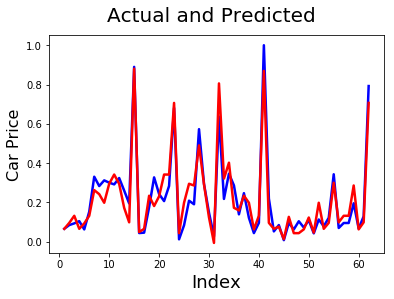

In [1880]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m1, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

Text(0,0.5,'ytest-ypred')

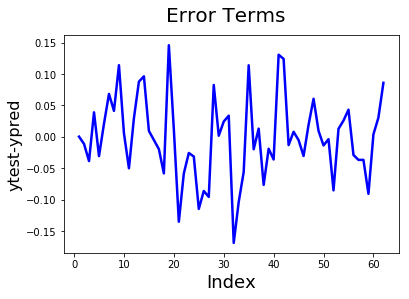

In [1881]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred_m1, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Index')

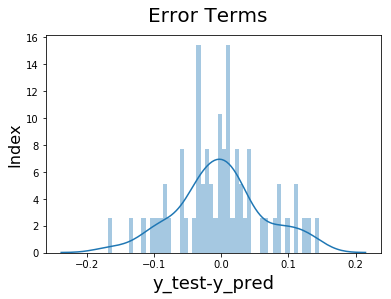

In [1882]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m1),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [1883]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m1)))
#6% of values are not matched.

RMSE : 0.06511403310604562


In [1884]:
from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(y_test, y_pred_m1) 
r_squared = r2_score(y_test, y_pred_m1) 
 
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared) 
#This is good model as the error is 4% and R-squared for test data is close to train data and high value indicates that 90% of variance

Mean_Squared_Error : 0.004239837307335206
r_square_value : 0.9017590124832231
